In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
df = pd.read_csv('nyc-rolling-sales-dirty.csv', index_col=0)

C:\Users\123\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# 84548 and 21 columns
df.shape

(84548, 21)

In [4]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


# Data Errors

# TAX CLASS AT PRESENT

In [5]:
# 'TAX CLASS AT PRESENT' column has 738 white spaces
sum(df['TAX CLASS AT PRESENT'] == ' ')

738

In [6]:
# Let's convert them into NaN
df['TAX CLASS AT PRESENT'].replace(' ', np.nan, inplace = True)

In [7]:
# Now, there is no white space in 'TAX CLASS AT PRESENT' column
sum(df['TAX CLASS AT PRESENT'] == ' ')

0

# EASE-MENT

In [8]:
# 'EASE-MENT' column has all white spaces. It is useless
df['EASE-MENT'].value_counts()

     84548
Name: EASE-MENT, dtype: int64

In [9]:
# Let's delete EASE-MENT column
df.drop('EASE-MENT', axis = 1, inplace = True)

# BUILDING CLASS AT PRESENT

In [10]:
# BUILDING CLASS AT PRESENT column has one value 65000 which is probably an error
sum(df['BUILDING CLASS AT PRESENT'] == '65000')

1

In [11]:
# BUILDING CLASS AT PRESENT column has 738 white spaces which are missing values
sum(df['BUILDING CLASS AT PRESENT'] == ' ')

738

In [12]:
# Let's convert them value to NaN
df['BUILDING CLASS AT PRESENT'].replace('65000', np.nan, inplace = True)
df['BUILDING CLASS AT PRESENT'].replace(' ', np.nan, inplace = True)

In [13]:
# Now there is no 65000 value in BUILDING CLASS AT PRESENT column
sum(df['BUILDING CLASS AT PRESENT'] == '65000')

0

In [14]:
# Now there are no white spaces in BUILDING CLASS AT PRESENT column
sum(df['BUILDING CLASS AT PRESENT'] == ' ')

0

# APARTMENT NUMBER

In [15]:
# APARTMENT NUMBER column has 65495 white spaces
sum(df['APARTMENT NUMBER'] == ' ')

65495

In [16]:
# Let's convert white spaces into NaN. Later we'll deal with it in missing values section
df['APARTMENT NUMBER'].replace(' ', np.nan, inplace = True)

In [17]:
# Now, there is no white space in ['APARTMENT NUMBER column
sum(df['APARTMENT NUMBER'] == ' ')

0

# ZIP CODE

In [18]:
# There is a 0 zip code which is basically a missing value
df['ZIP CODE'].value_counts().index.sort_values()

Float64Index([    0.0, 10001.0, 10002.0, 10003.0, 10004.0, 10005.0, 10006.0,
              10007.0, 10009.0, 10010.0,
              ...
              11430.0, 11432.0, 11433.0, 11434.0, 11435.0, 11436.0, 11691.0,
              11692.0, 11693.0, 11694.0],
             dtype='float64', length=186)

In [19]:
#Let's fill 0 with NaN
df['ZIP CODE'].replace(0.0, np.nan, inplace = True)

# LAND SQUARE FEET

In [20]:
#There are 26252 values with - sign which is a data error
sum(df['LAND SQUARE FEET'] == ' -  ')

26252

In [21]:
# 10326 values with 0 value which is a missing value since Land Square Feet cannot be 0
sum(df['LAND SQUARE FEET'] == '0')

10326

In [22]:
#Let's convert them into NaN
df['LAND SQUARE FEET'].replace(' -  ', np.nan, inplace = True)
df['LAND SQUARE FEET'].replace('0', np.nan, inplace = True)

In [23]:
# Now, there are no data errors
print(sum(df['LAND SQUARE FEET'] == ' -  '))
print(sum(df['LAND SQUARE FEET'] == '0'))

0
0


# GROSS SQUARE FEET

In [24]:
#There are 27612 values with - sign which is a data error
sum(df['GROSS SQUARE FEET'] == ' -  ')

27612

In [25]:
# 11417 values with 0 value which is a missing value since GROSS SQUARE FEET cannot be 0
sum(df['GROSS SQUARE FEET'] == '0')

11417

In [26]:
# Let's fill them with NaN
df['GROSS SQUARE FEET'].replace(' -  ', np.nan, inplace = True)
df['GROSS SQUARE FEET'].replace('0', np.nan, inplace = True)

In [27]:
#Now, there is no data error
print(sum(df['GROSS SQUARE FEET'] == ' -  '))
print(sum(df['GROSS SQUARE FEET'] == '0'))

0
0


# YEAR BUILT

In [28]:
# There are 6970 0 values in YEAR BUILT column. 0 can't be year so this is a data error
sum(df['YEAR BUILT'] == 0)

6970

In [29]:
# Let's fill 0 with NaN
df['YEAR BUILT'].replace(0, np.nan, inplace = True)

In [30]:
# Now there is no data error
sum(df['YEAR BUILT'] == 0)

0

# SALE PRICE

In [31]:
#There are 14561 values with - sign which is a data error
sum(df['SALE PRICE'] == ' -  ')

14561

In [32]:
# Let's fill them with 0
df['SALE PRICE'].replace(' -  ', 0, inplace = True)
df['SALE PRICE'].replace(10.0, 0, inplace = True)
df['SALE PRICE'].replace(1.0, 0, inplace = True)

In [33]:
# Now there is no data error
print(sum(df['SALE PRICE'] == ' -  '))

0


# LOT

In [34]:
# 9 values are No Number in LOT column
sum(df['LOT'] == 'No Number')

9

In [35]:
# Let's fill them with NaN
df['LOT'].replace('No Number', np.nan, inplace = True)

In [36]:
# We can see that there is 1 of string data type and 1 of integer data type.
# Like this, there are many numbers which are same but have different data type

df['LOT'].value_counts().index

Index([   '1',   '20',   '40',   '23',   '12',      1,   '29',   '19',   '16',
         '10',
       ...
       '1972', '4092', '2374', '4215', '5181', '1783',  '499', '2237',   1685,
       '4151'],
      dtype='object', length=3427)

In [37]:
# So, let's convert all integer data types into string
df['LOT'] = df['LOT'].apply(lambda x: str(x) if x is not np.nan else x)

# SALE DATE

In [38]:
# There are three words 'why', 'not sure', 'later' in sale date column which are data errors

list(df['SALE DATE'].value_counts().index.sort_values(ascending = False))

['why ',
 'not sure',
 'later',
 '9/9/2016 0:00',
 '9/8/2016 0:00',
 '9/7/2016 0:00',
 '9/6/2016 0:00',
 '9/5/2016 0:00',
 '9/4/2016 0:00',
 '9/30/2016 0:00',
 '9/3/2016 0:00',
 '9/29/2016 0:00',
 '9/28/2016 0:00',
 '9/27/2016 0:00',
 '9/26/2016 0:00',
 '9/25/2016 0:00',
 '9/24/2016 0:00',
 '9/23/2016 0:00',
 '9/22/2016 0:00',
 '9/21/2016 0:00',
 '9/20/2016 0:00',
 '9/2/2016 0:00',
 '9/19/2016 0:00',
 '9/18/2016 0:00',
 '9/17/2016 0:00',
 '9/16/2016 0:00',
 '9/15/2016 0:00',
 '9/14/2016 0:00',
 '9/13/2016 0:00',
 '9/12/2016 0:00',
 '9/11/2016 0:00',
 '9/10/2016 0:00',
 '9/1/2016 0:00',
 '8/9/2017 0:00',
 '8/8/2017 0:00',
 '8/7/2017 0:00',
 '8/6/2017 0:00',
 '8/5/2017 0:00',
 '8/4/2017 0:00',
 '8/31/2017 0:00',
 '8/30/2017 0:00',
 '8/3/2017 0:00',
 '8/29/2017 0:00',
 '8/28/2017 0:00',
 '8/27/2017 0:00',
 '8/26/2017 0:00',
 '8/25/2017 0:00',
 '8/24/2017 0:00',
 '8/23/2017 0:00',
 '8/22/2017 0:00',
 '8/21/2017 0:00',
 '8/20/2017 0:00',
 '8/2/2017 0:00',
 '8/19/2017 0:00',
 '8/18/2017 0:00

In [39]:
# Let's replace them with NaN

df['SALE DATE'].replace('why ', np.nan, inplace = True)
df['SALE DATE'].replace('not sure', np.nan, inplace = True)
df['SALE DATE'].replace('later', np.nan, inplace = True)

# BUILDING CLASS CATEGORY

In [40]:
# We can see that BUILDING CLASS CATEGORY values has unnecessary spaces in the end
df['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '37 RELIGIOUS FACILITIES                    ',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ',
       '46 CONDO STORE BUILDINGS                   ',
       '47 CONDO NON-BUSINESS STORAGE              ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWE

In [41]:
# Let's remove unnecessary spaces
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].apply(lambda x : x.strip() if x is not np.nan else x)

In [42]:
# Better now
df['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS',
       '08 RENTALS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS',
       '10 COOPS - ELEVATOR APARTMENTS', '11A CONDO-RENTALS',
       '12 CONDOS - WALKUP APARTMENTS', '13 CONDOS - ELEVATOR APARTMENTS',
       '14 RENTALS - 4-10 UNIT', '15 CONDOS - 2-10 UNIT RESIDENTIAL',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT', '17 CONDO COOPS',
       '22 STORE BUILDINGS', '37 RELIGIOUS FACILITIES',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC',
       '46 CONDO STORE BUILDINGS', '47 CONDO NON-BUSINESS STORAGE',
       '01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '03 THREE FAMILY DWELLINGS', '04 TAX CLASS 1 CONDOS',
       '21 OFFICE BUILDINGS', '23 LOFT BUILDINGS', '25 LUXURY HOTELS',
       '26 OTHER HOTELS', '28 COMMERCIAL CONDOS', '29 COMMERCIAL GARAGES',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES', '38 ASYLUMS AND HOMES',
       '43 CONDO OFFICE BUILDINGS', '44 CONDO PARKING',
       '48 CONDO TERRACES/GARDE

# TAX CLASS AT PRESENT

In [43]:
# Notice that there are both int and string data type of 1 and 2
df['TAX CLASS AT PRESENT'].unique()

array(['2A', '2', nan, '2B', '2C', '4', '1', '1C', '3', '1A', '1B'],
      dtype=object)

In [44]:
# Let's convert them into string

df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].apply(lambda x: str(x) if x is not np.nan else x)

In [45]:
# Better now
df['TAX CLASS AT PRESENT'].unique()

array(['2A', '2', nan, '2B', '2C', '4', '1', '1C', '3', '1A', '1B'],
      dtype=object)

# Filling Missing values

**IMPORTANT**: I have not used any imputer because all columns are categorical columns. Even though some columns have numeric datatype but still they cannot be treated as numerical values because for example, if I apply imputer on zipcodes, and Borough etc, imputer will fill missing values with mean and mean can be in decimal numbers but 23422.12 cannot be a zip code. Neither can 1.5 be a borough so I have filled all columns manually.

Some columns have above 30% missing values so I have dropped them

In [46]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                   9
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                           1018
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

# Filling null values in NEIGHBORHOOD

Null value NEIGHBORHOOD have 2 and 3 BOROUGH. Since BOROUGH is where the property is located, so filling NEIGHBORHOOD values based on BOROUGH is the good idea. We find the mode of NEIGHBORHOOD where BOROUGH is 2 and 3 separately and then we fill corresponding NEIGHBORHOOD null fields with respective mode.


In [47]:
df[df['NEIGHBORHOOD'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
2929,2,NaN,05 TAX CLASS 1 VACANT LAND,1B,4040.0,10,V0,N/A BARNES AVENUE,NaN,10462.0,0,0,0,2375,NaN,NaN,1,V0,0,6/19/2017 0:00
2930,2,NaN,05 TAX CLASS 1 VACANT LAND,1B,4042.0,21,V0,VAN NEST AVENUE,NaN,10462.0,0,0,0,2079,NaN,NaN,1,V0,0,8/18/2017 0:00
2931,2,NaN,05 TAX CLASS 1 VACANT LAND,1B,4059.0,16,V0,N/A RADCLIFF AVENUE,NaN,10462.0,0,0,0,1248,NaN,NaN,1,V0,0,6/26/2017 0:00
2932,2,NaN,05 TAX CLASS 1 VACANT LAND,1B,4090.0,17,V0,1190 PIERCE AVENUE,NaN,10461.0,0,0,0,5777,NaN,NaN,1,V0,0,9/21/2016 0:00
2933,2,NaN,05 TAX CLASS 1 VACANT LAND,1B,4131.0,8,V0,1116 RHINELANDER AVENUE,NaN,10461.0,0,0,0,2250,NaN,NaN,1,V0,1000,2/23/2017 0:00
2934,2,NaN,05 TAX CLASS 1 VACANT LAND,1B,4201.0,44,V0,1824 YATES AVENUE,NaN,10461.0,0,0,0,2500,NaN,NaN,1,V0,0,7/31/2017 0:00
2935,2,NaN,05 TAX CLASS 1 VACANT LAND,1B,4275.0,49,V0,1916 YATES AVENUE,NaN,10461.0,0,0,0,2500,NaN,NaN,1,V0,0,12/21/2016 0:00
2936,2,NaN,06 TAX CLASS 1 - OTHER,1,4036.0,16,G0,1721 BARNES AVENUE,NaN,10462.0,0,0,0,2375,432,1934.0,1,G0,20000,7/27/2017 0:00
2937,2,NaN,06 TAX CLASS 1 - OTHER,1,4036.0,19,G0,1715 BARNES AVENUE,NaN,10462.0,0,0,0,2375,625,1950.0,1,G0,0,7/3/2017 0:00
2938,2,NaN,06 TAX CLASS 1 - OTHER,1,4051.0,14,G0,1818 HUNT AVENUE,NaN,10462.0,0,0,0,2375,684,1950.0,1,G0,80000,11/4/2016 0:00


In [48]:
for borough in df[df['NEIGHBORHOOD'].isnull()]['BOROUGH'].unique():
    mode = df[df['BOROUGH'] == borough]['NEIGHBORHOOD'].mode().values[0]
    df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].mask((df['NEIGHBORHOOD'].isnull()) & (df['BOROUGH'] == borough), mode)

In [49]:
df[df['NEIGHBORHOOD'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


# Filling null values in BUILDING CLASS CATEGORY column

We can fill BUILDING CLASS CATEGORY column missing values based on two columns named, BOROUGH and NEIGHBORHOOD

So things go like this:

1. Mode: Where BOROUGH is 4 and NEIGHBORHOOD is ASTORIA
2. Mode: Where BOROUGH is 4 and NEIGHBORHOOD is LONG ISLAND CITY
3. Mode: Where BOROUGH is 5 and NEIGHBORHOOD is LONG NEW BRIGHTON

Also notice that TAX CLASS AT PRESENT column also agrees with our scheme above.

In [50]:
df[df['BUILDING CLASS CATEGORY'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
657,4,ASTORIA,NaN,1,657.0,49,C0,31-20 38TH STREET,NaN,11103.0,3,0,3,2500,2784,1910.0,1,C0,0,1/11/2017 0:00
658,4,ASTORIA,NaN,1,657.0,72,C0,31-76 38TH STREET,NaN,11103.0,3,0,3,2500,2660,1910.0,1,C0,0,12/21/2016 0:00
659,4,ASTORIA,NaN,1,661.0,14,C0,28-17 37TH STREET,NaN,11103.0,3,0,3,2869,3468,1910.0,1,C0,0,1/23/2017 0:00
660,4,ASTORIA,NaN,1,664.0,114,C0,28-17 41ST STREET,NaN,11103.0,3,0,3,2500,2200,1941.0,1,C0,0,4/7/2017 0:00
661,4,ASTORIA,NaN,1,677.0,65,C0,32-66 42ND STREET,NaN,11103.0,3,0,3,2000,2378,1945.0,1,C0,0,5/8/2017 0:00
662,4,ASTORIA,NaN,1,689.0,11,C0,24-25 43RD STREET,NaN,11103.0,3,0,3,2400,3308,1964.0,1,C0,0,5/23/2017 0:00
663,4,ASTORIA,NaN,1,689.0,48,C0,43-17 25TH AVENUE,NaN,11103.0,3,0,3,1650,1616,1935.0,1,C0,0,5/3/2017 0:00
664,4,ASTORIA,NaN,1,695.0,5,C0,30-89 42ND STREET,NaN,11103.0,3,0,3,1640,2000,1920.0,1,C0,1475000,2/15/2017 0:00
665,4,ASTORIA,NaN,1,696.0,189,C0,30-78 43RD STREET,NaN,11103.0,3,0,3,1919,3339,1910.0,1,C0,1300000,8/15/2017 0:00
666,4,ASTORIA,NaN,1,697.0,41,C0,30-57 43RD STREET,NaN,11103.0,3,0,3,2000,2532,1910.0,1,C0,0,7/7/2017 0:00


1. Finding mode where BOROUGH is 4 and NEIGHBORHOOD is ASTORIA

In [51]:
df[(df['BOROUGH'] == 4) & (df['NEIGHBORHOOD'] == 'ASTORIA')]['BUILDING CLASS CATEGORY'].mode()

0    02 TWO FAMILY DWELLINGS
dtype: object

Filling null values with the mode found above

In [52]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].mask((df['BUILDING CLASS CATEGORY'].isnull()) & (df['BOROUGH'] == 4) & (df['NEIGHBORHOOD'] == 'ASTORIA'), '02 TWO FAMILY DWELLINGS')

2. Finding mode where BOROUGH is 4 and NEIGHBORHOOD is LONG ISLAND CITY

In [53]:
df[(df['BOROUGH'] == 4) & (df['NEIGHBORHOOD'] == 'LONG ISLAND CITY')]['BUILDING CLASS CATEGORY'].mode()

0    13 CONDOS - ELEVATOR APARTMENTS
dtype: object

Filling null values with the mode found above

In [54]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].mask((df['BUILDING CLASS CATEGORY'].isnull()) & (df['BOROUGH'] == 4) & (df['NEIGHBORHOOD'] == 'LONG ISLAND CITY'), '13 CONDOS - ELEVATOR APARTMENTS')

3. Finding mode where BOROUGH is 4 and NEIGHBORHOOD is NEW BRIGHTON

In [55]:
df[(df['BOROUGH'] == 5) & (df['NEIGHBORHOOD'] == 'NEW BRIGHTON')]['BUILDING CLASS CATEGORY'].mode()

0    02 TWO FAMILY DWELLINGS
dtype: object

Filling null values with the mode found above

In [56]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].mask((df['BUILDING CLASS CATEGORY'].isnull()) & (df['BOROUGH'] == 5) & (df['NEIGHBORHOOD'] == 'NEW BRIGHTON'), '02 TWO FAMILY DWELLINGS')

 **BINGO! NO null values now!**

In [57]:
df[df['BUILDING CLASS CATEGORY'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


# Filling null values in TAX CLASS AT PRESENT column

TAX CLASS AT PRESENT column has total of 745 rows which is 0.008% so we can't just remove. Let's fill them.

In [58]:
df[df['TAX CLASS AT PRESENT'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,C7,NaN,NaN,NaN,16,1,17,2212,7803,1900.0,2,C7,0,12/9/2016 0:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,C4,NaN,NaN,NaN,10,0,10,2272,6794,1913.0,2,C4,3936272,9/23/2016 0:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,C2,NaN,NaN,NaN,6,0,6,2369,4615,1900.0,2,C2,8000000,11/17/2016 0:00
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,C4,NaN,NaN,NaN,20,0,20,2581,9730,1900.0,2,C4,0,NaN
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,C4,NaN,NaN,NaN,8,0,8,1750,4226,1920.0,2,C4,3192840,9/23/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17027,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,NaN,268.0,1050,NaN,27-21 44TH DRIVE,NaN,11101.0,0,0,0,NaN,NaN,NaN,2,R4,809508,8/30/2017 0:00
17028,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,NaN,268.0,1057,NaN,27-21 44TH DRIVE,NaN,11101.0,0,0,0,NaN,NaN,NaN,2,R4,911333,8/23/2017 0:00
17292,4,LONG ISLAND CITY,47 CONDO NON-BUSINESS STORAGE,NaN,268.0,1151,NaN,27-21 44TH DRIVE,NaN,11101.0,0,0,0,NaN,NaN,NaN,4,RS,20080,8/25/2017 0:00
24491,4,SPRINGFIELD GARDENS,05 TAX CLASS 1 VACANT LAND,NaN,12529.0,220,NaN,NA 172ND STREET,NaN,NaN,0,0,0,NaN,NaN,NaN,1,V0,3500000,7/27/2017 0:00


In [59]:
for borough in df[df['TAX CLASS AT PRESENT'].isnull()]['BOROUGH'].unique():
    mode = df[df['BOROUGH'] == borough]['TAX CLASS AT PRESENT'].mode().values[0]
    df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].mask((df['TAX CLASS AT PRESENT'].isnull()) & (df['BOROUGH'] == borough), mode)

In [60]:
# BINGO! Now, there are no null values
df[df['TAX CLASS AT PRESENT'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


# Filling missing values in BLOCK column

In [61]:
# Notice that null values BLOCK has same BOROUGH and NEIGHBORHOOD so let's fill BLOCK null values with the mode of it
# Where NEIGHBORHOOD is ALPHABET CITY
df[df['BLOCK'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
14,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,NaN,44,D7,NaN,NaN,NaN,30,4,34,4295,21328,1910.0,2,D7,0,7/20/2017 0:00
15,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,NaN,21,D1,530-532 EAST 5TH STREET,NaN,NaN,10,0,10,3717,12350,2009.0,2,D1,10350000,10/17/2016 0:00
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,40,C6,"327 EAST 3 STREET, 1C",NaN,NaN,0,0,0,NaN,NaN,1920.0,2,C6,1,9/6/2016 0:00
17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,40,C6,"327 EAST 3 STREET, 1C",NaN,NaN,0,0,0,NaN,NaN,1920.0,2,C6,499000,3/10/2017 0:00
18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,40,C6,"327 EAST 3 STREET, 3A",NaN,NaN,0,0,0,NaN,NaN,1920.0,2,C6,10,4/28/2017 0:00
19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,40,C6,"327 EAST 3RD STREET, 5A",NaN,NaN,0,0,0,NaN,NaN,1920.0,2,C6,529500,6/9/2017 0:00
20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,40,C6,"327 EAST 3 STREET, 2E",NaN,10009.0,0,0,0,NaN,NaN,1920.0,2,C6,423000,7/14/2017 0:00
21,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,NaN,46,C6,"317 EAST 3RD STREET, 12",NaN,10009.0,0,0,0,NaN,NaN,1925.0,2,C6,501000,3/16/2017 0:00
85,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,NaN,1005,R4,324 EAST 4TH STREET,4A,10009.0,1,0,1,NaN,NaN,1920.0,2,R4,1034880,11/3/2016 0:00
86,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,NaN,1006,R4,324 EAST 4TH STREET,4B,10009.0,1,0,1,NaN,NaN,1920.0,2,R4,0,11/3/2016 0:00


In [62]:
# Finding mode
df[df['NEIGHBORHOOD'] == 'ALPHABET CITY']['BLOCK'].mode()

0    402.0
dtype: float64

In [63]:
# Filling with the mode
df['BLOCK'] = df['BLOCK'].mask(df['BLOCK'].isnull(), 402.0)

In [64]:
# BINGO! Now, there are no null values
df[df['BLOCK'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


# Filling null values of LOT column

In [65]:
# Since LOT represents the exact location of the property to I will fill these null values based on the NEIGHBOURHOOD Column
df[df['LOT'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,NaN,NaN,NaN,NaN,10009.0,5,0,5,1633,6440,1900.0,2,C2,6625000,NaN
557,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,695.0,NaN,R4,555 WEST 23RD STREET,N12H,10011.0,1,0,1,NaN,NaN,2005.0,2,R4,1700000,12/2/2016 0:00
971,1,CHELSEA,43 CONDO OFFICE BUILDINGS,4,803.0,NaN,RB,305 SEVENTH AVENUE,7C,10001.0,0,0,1,NaN,NaN,NaN,4,RB,0,12/15/2016 0:00
1523,1,CLINTON,10 COOPS - ELEVATOR APARTMENTS,2,1067.0,NaN,D4,"457 WEST 57TH STREET, 804",NaN,10019.0,0,0,0,NaN,NaN,1929.0,2,D4,381565,8/16/2017 0:00
2007,1,FASHION,13 CONDOS - ELEVATOR APARTMENTS,2,762.0,NaN,R4,502 9TH AVENUE,3A,10018.0,1,0,1,NaN,NaN,2005.0,2,R4,735000,9/22/2016 0:00
2513,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,68.0,NaN,R4,80 JOHN STREET,9E,10038.0,1,0,1,NaN,NaN,1927.0,2,R4,825000,1/23/2017 0:00
2605,1,FLATIRON,10 COOPS - ELEVATOR APARTMENTS,2,816.0,NaN,D4,"10 WEST 15TH STREET, 2022",NaN,10011.0,0,0,0,NaN,NaN,1964.0,2,D4,875000,1/18/2017 0:00
2628,1,FLATIRON,10 COOPS - ELEVATOR APARTMENTS,2,817.0,NaN,D4,"16 WEST 16TH STREET, 1UN",NaN,10011.0,0,0,0,NaN,NaN,1964.0,2,D4,685000,1/10/2017 0:00
6897,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5246.0,NaN,A1,33-80 162ND STREET,NaN,11358.0,1,0,1,8000,3984,1930.0,1,A1,1600000,12/30/2016 0:00


In [66]:
# We have total of 7 unique neighbourhoods where LOT is null
df[df['LOT'].isnull()]['NEIGHBORHOOD'].value_counts()

FLATIRON          2
CHELSEA           2
FASHION           1
FLUSHING-NORTH    1
FINANCIAL         1
ALPHABET CITY     1
CLINTON           1
Name: NEIGHBORHOOD, dtype: int64

In [67]:
for neighbor in df[df['LOT'].isnull()]['NEIGHBORHOOD'].unique():
    mode = df[df['NEIGHBORHOOD'] == neighbor]['LOT'].mode().values[0]
    df['LOT'] = df['LOT'].mask((df['LOT'].isnull()) & (df['NEIGHBORHOOD'] == neighbor), mode)

In [68]:
# BINGO! There are not null values now in LOT column
df[df['LOT'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


# Filling null values of BUILDING CLASS AT PRESENT column

In [69]:
df[df['BUILDING CLASS AT PRESENT'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,1003,NaN,NaN,NaN,10009.0,5,0,5,1633,6440,1900.0,2,C2,6625000,NaN
78,1,ALPHABET CITY,11A CONDO-RENTALS,2,394.0,1602,NaN,183-189 AVENUE B,NaN,NaN,0,0,0,NaN,NaN,NaN,2,RR,8058923,8/9/2017 0:00
202,1,ALPHABET CITY,42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,2,394.0,1601,NaN,183-189 AVENUE B,NaN,NaN,0,0,0,NaN,NaN,NaN,4,RA,0,8/9/2017 0:00
577,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,699.0,1306,NaN,510 WEST 28TH STREET,NaN,10001.0,0,0,0,NaN,NaN,NaN,2,R4,7165843,8/9/2017 0:00
578,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,699.0,1309,NaN,510 WEST 28TH STREET,NaN,10001.0,0,0,0,NaN,NaN,NaN,2,R4,4937073,8/2/2017 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17027,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,1,268.0,1050,NaN,27-21 44TH DRIVE,NaN,11101.0,0,0,0,NaN,NaN,NaN,2,R4,809508,8/30/2017 0:00
17028,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,1,268.0,1057,NaN,27-21 44TH DRIVE,NaN,11101.0,0,0,0,NaN,NaN,NaN,2,R4,911333,8/23/2017 0:00
17292,4,LONG ISLAND CITY,47 CONDO NON-BUSINESS STORAGE,1,268.0,1151,NaN,27-21 44TH DRIVE,NaN,11101.0,0,0,0,NaN,NaN,NaN,4,RS,20080,8/25/2017 0:00
24491,4,SPRINGFIELD GARDENS,05 TAX CLASS 1 VACANT LAND,1,12529.0,220,NaN,NA 172ND STREET,NaN,NaN,0,0,0,NaN,NaN,NaN,1,V0,3500000,7/27/2017 0:00


In [70]:
for i in df[df['BUILDING CLASS AT PRESENT'].isnull()]['TAX CLASS AT PRESENT'].unique():
    mode = df[df['TAX CLASS AT PRESENT'] == i]['BUILDING CLASS AT PRESENT'].mode().values[0]
    df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].mask((df['BUILDING CLASS AT PRESENT'].isnull()) & (df['TAX CLASS AT PRESENT'] == i), str(mode))

In [71]:
# BINGO! NOw, there are no null values
df[df['BUILDING CLASS AT PRESENT'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


# Filling missing values in ADDRESS column

In [72]:
df[df['ADDRESS'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,1003,C3,NaN,NaN,10009.0,5,0,5,1633,6440,1900.0,2,C2,6625000,NaN
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,C7,NaN,NaN,NaN,28,3,31,4616,18690,1900.0,2,C7,0,12/14/2016 0:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39,C7,NaN,NaN,NaN,16,1,17,2212,7803,1900.0,2,C7,0,12/9/2016 0:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,402.0,21,C4,NaN,NaN,NaN,10,0,10,2272,6794,1913.0,2,C4,3936272,9/23/2016 0:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,404.0,55,C2,NaN,NaN,NaN,6,0,6,2369,4615,1900.0,2,C2,8000000,11/17/2016 0:00
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405.0,16,C4,NaN,NaN,NaN,20,0,20,2581,9730,1900.0,2,C4,0,NaN
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,406.0,32,C4,NaN,NaN,NaN,8,0,8,1750,4226,1920.0,2,C4,3192840,9/23/2016 0:00
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407.0,18,C7,NaN,NaN,NaN,44,2,46,5163,21007,1900.0,2,C7,0,7/20/2017 0:00
12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379.0,34,D5,NaN,NaN,NaN,15,0,15,1534,9198,1920.0,2,D5,0,6/20/2017 0:00
13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.0,153,D9,NaN,NaN,NaN,24,0,24,4489,18523,1920.0,2,D9,16232000,11/7/2016 0:00


In [73]:
df[df['ADDRESS'].isnull()]['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'BOROUGH PARK'], dtype=object)

In [74]:
for neighbor in df[df['ADDRESS'].isnull()]['NEIGHBORHOOD'].unique():
    mode = df[df['NEIGHBORHOOD'] == neighbor]['ADDRESS'].mode().values[0]
    df['ADDRESS'] = df['ADDRESS'].mask((df['ADDRESS'].isnull()) & (df['NEIGHBORHOOD'] == neighbor), mode)

In [75]:
df[df['ADDRESS'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


I will drop following three columns:

- APARTMENT NUMBER has 65496 null values which is 77.5% of the data.
- LAND SQUARE FEET has 36578 null values which is 43.3% of the data.
- GROSS SQUARE FEET has 39029 null values which is 46.2% of the data.

In [76]:
df.drop('APARTMENT NUMBER', axis = 1, inplace = True)
df.drop('LAND SQUARE FEET', axis = 1, inplace = True)
df.drop('GROSS SQUARE FEET', axis = 1, inplace = True)

# Missing values in ZIP CODE column

In [77]:
df[df['ZIP CODE'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,C7,100 AVENUE A,NaN,28,3,31,1900.0,2,C7,0,12/14/2016 0:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39,C7,100 AVENUE A,NaN,16,1,17,1900.0,2,C7,0,12/9/2016 0:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,402.0,21,C4,100 AVENUE A,NaN,10,0,10,1913.0,2,C4,3936272,9/23/2016 0:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,404.0,55,C2,100 AVENUE A,NaN,6,0,6,1900.0,2,C2,8000000,11/17/2016 0:00
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405.0,16,C4,100 AVENUE A,NaN,20,0,20,1900.0,2,C4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1481.0,40,V0,N/A HOME PLACE,NaN,0,0,0,NaN,1,V0,0,12/29/2016 0:00
8031,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1481.0,300,V0,N/A TUTTLE STREET,NaN,0,0,0,NaN,1,V0,0,12/29/2016 0:00
8033,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1524.0,22,V0,CAMBRIDGE AVENUE,NaN,0,0,0,NaN,1,V0,300000,5/5/2017 0:00
8034,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1525.0,100,V0,WILLOW ROAD EAST,NaN,0,0,0,NaN,1,V0,0,2/24/2017 0:00


In [78]:
# I will fill ZIP CODE null values based on NEIGHORHOOD because NEIGHORHOOD will most probably have same ZIP CODEs
df[df['ZIP CODE'].isnull()]['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'CHELSEA', 'CIVIC CENTER', 'CLINTON', 'FASHION',
       'FLATIRON', 'HARLEM-CENTRAL', 'HARLEM-UPPER', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MURRAY HILL', 'SOHO', 'TRIBECA',
       'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER WEST SIDE (59-79)', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONXDALE',
       'CITY ISLAND', 'COUNTRY CLUB', 'FIELDSTON', 'FORDHAM',
       'HIGHBRIDGE/MORRIS HEIGHTS', 'HUNTS POINT',
       'KINGSBRIDGE HTS/UNIV HTS', 'KINGSBRIDGE/JEROME PARK',
       'MELROSE/CONCOURSE', 'MORRIS PARK/VAN NEST', 'MORRISANIA/LONGWOOD',
       'MOTT HAVEN/PORT MORRIS', 'MOUNT HOPE/MOUNT EDEN', 'PARKCHESTER',
       'PELHAM BAY', 'PELHAM PARKWAY NORTH', 'RIVERDALE',
       'SCHUYLERVILLE/PELHAM BAY', 'SOUNDVIEW', 'WAKEFIELD',
       'WILLIAMSBRIDGE', 'BATH BEACH', 'BEDFORD STUYVESANT',
       'BENSONHURST', 'BOERUM HILL', 'BOROUGH PARK', 'BROOKLYN HEIGHTS',
      

In [79]:
for neighbor in df[df['ZIP CODE'].isnull()]['NEIGHBORHOOD'].unique():
    
    mode = df[df['NEIGHBORHOOD'] == neighbor]['ZIP CODE'].mode()
    if len(mode) == 0:
        mode = df['ZIP CODE'].mode().values[0]
    else:
        mode = mode.values[0]
    df['ZIP CODE'] = df['ZIP CODE'].mask((df['ZIP CODE'].isnull()) & (df['NEIGHBORHOOD'] == neighbor), mode)

In [80]:
# BINGO! NOw there are no missing values in ZIP CODE
df[df['ZIP CODE'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


# Missing values in YEAR BUILT Column

In [81]:
df[df['YEAR BUILT'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
78,1,ALPHABET CITY,11A CONDO-RENTALS,2,394.0,1602,D4,183-189 AVENUE B,10009.0,0,0,0,NaN,2,RR,8058923,8/9/2017 0:00
80,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386.0,1002,R2,211 EAST 3RD STREET,10009.0,1,0,1,NaN,2,R2,620000,12/30/2016 0:00
81,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,398.0,1039,R2,182 EAST 2ND STREET,10009.0,1,0,1,NaN,2,R2,0,2/24/2017 0:00
82,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,405.0,1211,R2,511 EAST 11TH STREET,10009.0,1,0,1,NaN,2,R2,0,7/20/2017 0:00
91,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,402.0,1004,R4,754 EAST 6TH STREET,10009.0,1,0,1,NaN,2,R4,875000,3/31/2017 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8033,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1524.0,22,V0,CAMBRIDGE AVENUE,10314.0,0,0,0,NaN,1,V0,300000,5/5/2017 0:00
8034,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,1525.0,100,V0,WILLOW ROAD EAST,10314.0,0,0,0,NaN,1,V0,0,2/24/2017 0:00
8255,5,WILLOWBROOK,05 TAX CLASS 1 VACANT LAND,1B,730.0,65,V0,81 KELL AVENUE,10314.0,0,0,0,NaN,1,V0,20000,1/4/2017 0:00
8256,5,WILLOWBROOK,05 TAX CLASS 1 VACANT LAND,1B,735.0,10,V0,N/A INGRAM AVENUE,10314.0,0,0,0,NaN,1,V0,0,2/17/2017 0:00


In [82]:
# Since there is no other reasonable column to fill missing values in YEAR BUILT so I will just fill it with its mode

df['YEAR BUILT'] = df['YEAR BUILT'].replace(np.nan, df['YEAR BUILT'].mode().values[0])

# Missing values in SALE DATE Column

In [83]:
df[df['SALE DATE'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,1003,C3,100 AVENUE A,10009.0,5,0,5,1900.0,2,C2,6625000,NaN
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405.0,16,C4,100 AVENUE A,10009.0,20,0,20,1900.0,2,C4,0,NaN
17225,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,4,31.0,1073,RP,5-15 49TH AVENUE,11101.0,0,0,1,2005.0,4,RP,0,NaN


In [84]:
# Since there is no other reasonable column to fill missing values in SALE DATE so I will just fill it with its mode

df['SALE DATE'] = df['SALE DATE'].replace(np.nan, df['SALE DATE'].mode().values[0])

# NO null values now

In [85]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Correcting column datatypes

In [86]:
df['ZIP CODE'] = df['ZIP CODE'].astype(int)
df['YEAR BUILT'] = df['YEAR BUILT'].astype(int)
df['SALE PRICE'] = df['SALE PRICE'].astype(float)
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [87]:
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                    float64
LOT                                       object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                   int32
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
YEAR BUILT                                 int32
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

# Extracting some columns from SALE DATE

In [88]:
df['Quarter'] = df['SALE DATE'].apply(lambda x: x.quarter)
df['Year'] = df['SALE DATE'].apply(lambda x: x.year)
df['Month'] = df['SALE DATE'].apply(lambda x: x.month)
df['Week'] = df['SALE DATE'].apply(lambda x: x.week)
df['Day'] = df['SALE DATE'].apply(lambda x: x.day)

In [89]:
df['Quarter'] = df['Quarter'].replace(1,"Q1")
df['Quarter'] = df['Quarter'].replace(2,"Q2")
df['Quarter'] = df['Quarter'].replace(3,"Q3")
df['Quarter'] = df['Quarter'].replace(4,"Q4")

In [90]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Quarter,Year,Month,Week,Day
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,1003,C3,100 AVENUE A,10009,5,...,1900,2,C2,6625000.0,2017-06-29,Q2,2017,6,26,29
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,C7,100 AVENUE A,10009,28,...,1900,2,C7,0.0,2016-12-14,Q4,2016,12,50,14
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39,C7,100 AVENUE A,10009,16,...,1900,2,C7,0.0,2016-12-09,Q4,2016,12,49,9
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,402.0,21,C4,100 AVENUE A,10009,10,...,1913,2,C4,3936272.0,2016-09-23,Q3,2016,9,38,23
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,404.0,55,C2,100 AVENUE A,10009,6,...,1900,2,C2,8000000.0,2016-11-17,Q4,2016,11,46,17


# Outliers

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


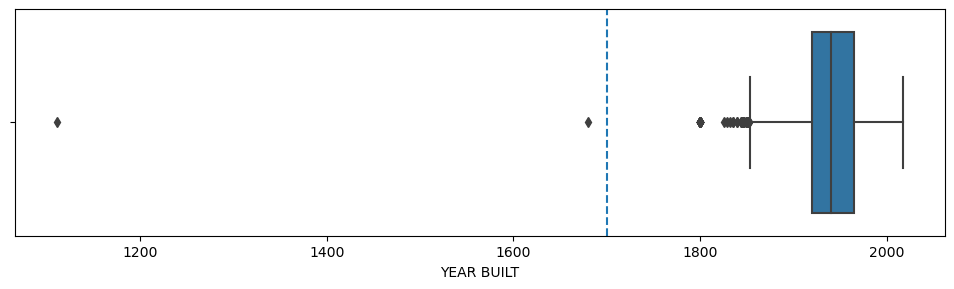

In [91]:
# Year less than 1700 are outliers
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['YEAR BUILT'])
plt.axvline(1700, ls='--')

In [92]:
# Let's remove year less than 1700
df = df[df['YEAR BUILT'] > 1700]

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEAR BUILT'>

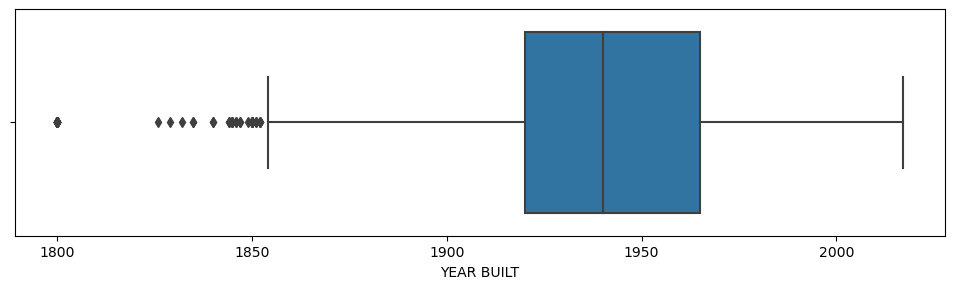

In [93]:
# Better now
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['YEAR BUILT'])

C:\Users\123\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YEAR BUILT', ylabel='Density'>

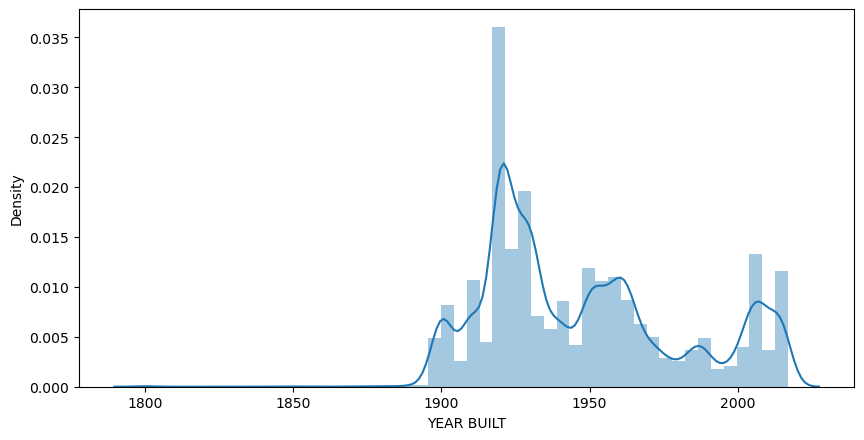

In [94]:
#Distribution of YEAR BUILT
plt.figure(figsize=(10, 5), dpi = 100)
sns.distplot(df['YEAR BUILT'])

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BLOCK'>

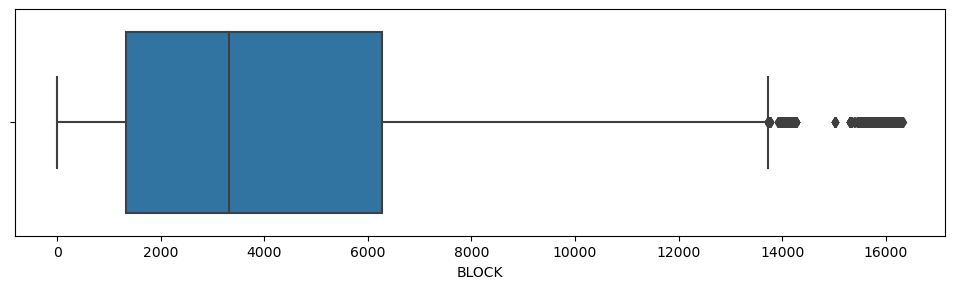

In [95]:
# BLOCK has around 1000 values greater than 15000 so we can't remove them
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['BLOCK'])

C:\Users\123\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLOCK', ylabel='Density'>

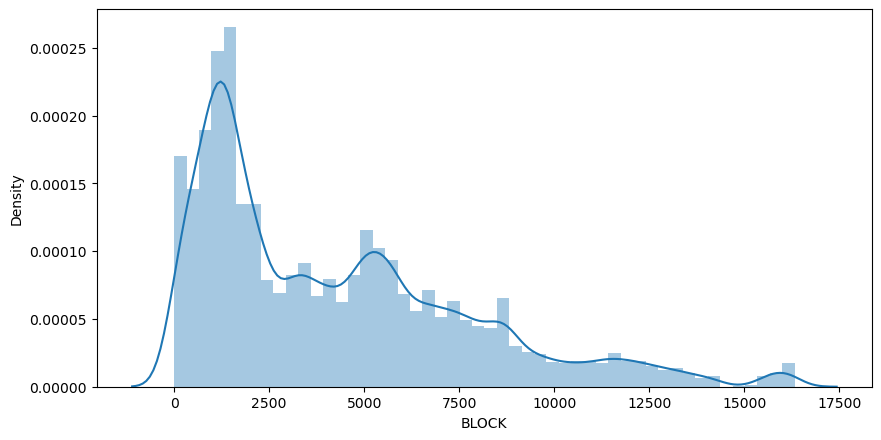

In [96]:
#Distribution of BLOCK
plt.figure(figsize=(10, 5), dpi = 100)
sns.distplot(df['BLOCK'])

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


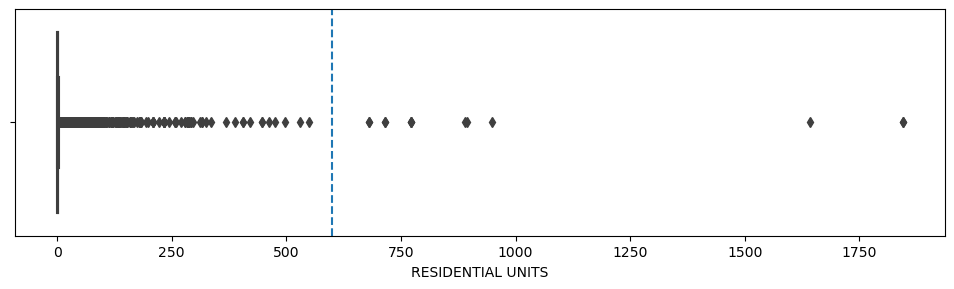

In [97]:
# Values greater than 600 are outliers
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['RESIDENTIAL UNITS'])
plt.axvline(600, ls='--')

In [98]:
# Let's remove them
df = df[df['RESIDENTIAL UNITS'] < 600]

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RESIDENTIAL UNITS'>

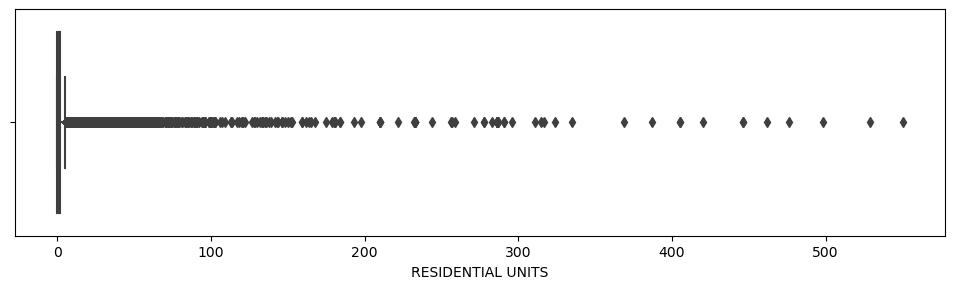

In [99]:
# Still we can see that there are so many values which are far away from average
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['RESIDENTIAL UNITS'])

In [100]:
# Let's remove values greater than 100
df = df[df['RESIDENTIAL UNITS'] < 100]

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


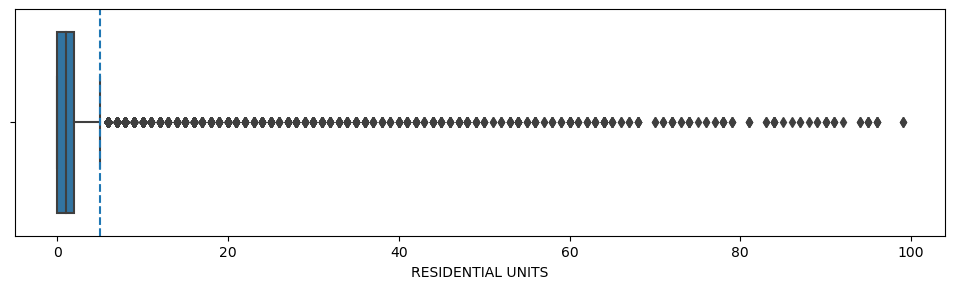

In [101]:
# Still we can see that there are so many values which are far away from average
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['RESIDENTIAL UNITS'])
plt.axvline(5, ls='--')

In [102]:
# Let's remove values greater than 5
df = df[df['RESIDENTIAL UNITS'] < 5]

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RESIDENTIAL UNITS'>

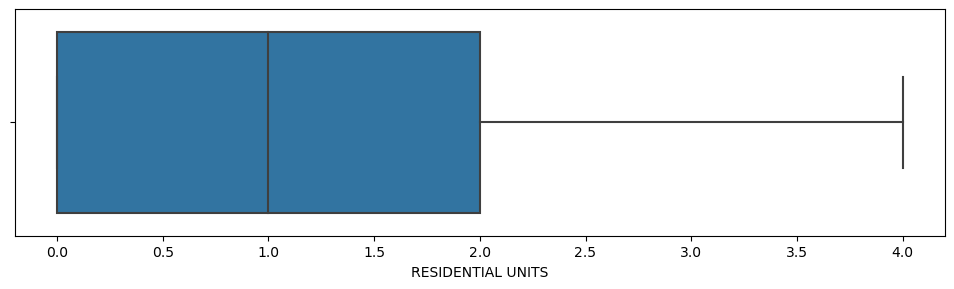

In [103]:
# Now our data is much better
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['RESIDENTIAL UNITS'])

C:\Users\123\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='Density'>

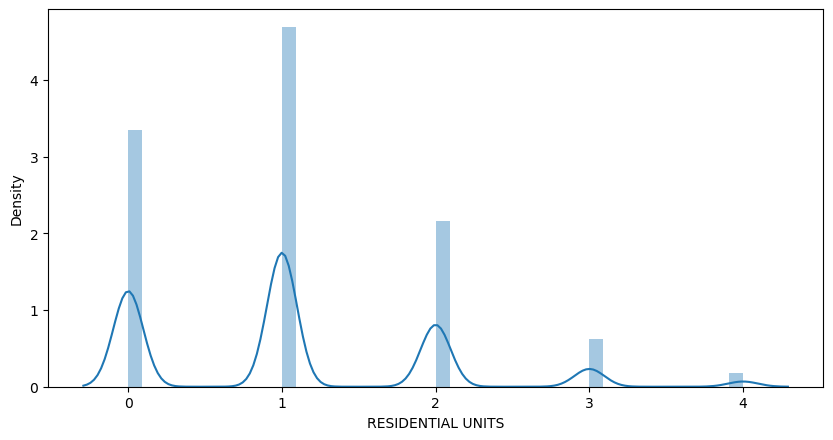

In [104]:
#Distribution of RESIDENTIAL UNITS
plt.figure(figsize=(10, 5), dpi = 100)
sns.distplot(df['RESIDENTIAL UNITS'])

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


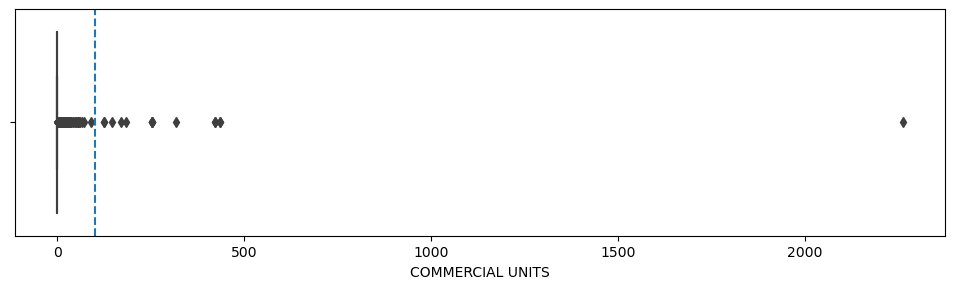

In [105]:
# Still we can see that there are so many values which are far away from average
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['COMMERCIAL UNITS'])
plt.axvline(100, ls='--')

In [106]:
df = df[df['COMMERCIAL UNITS'] < 100]

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='COMMERCIAL UNITS'>

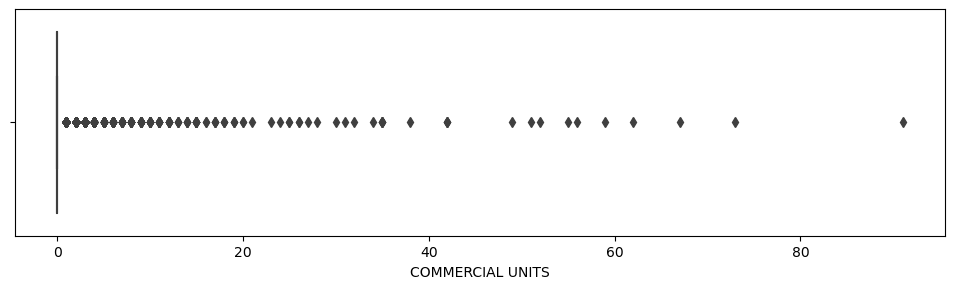

In [107]:
# Still we can see that there are so many values which are far away from average.
#The reason is that almost 90% of the values are 0
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['COMMERCIAL UNITS'])

C:\Users\123\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='COMMERCIAL UNITS', ylabel='Density'>

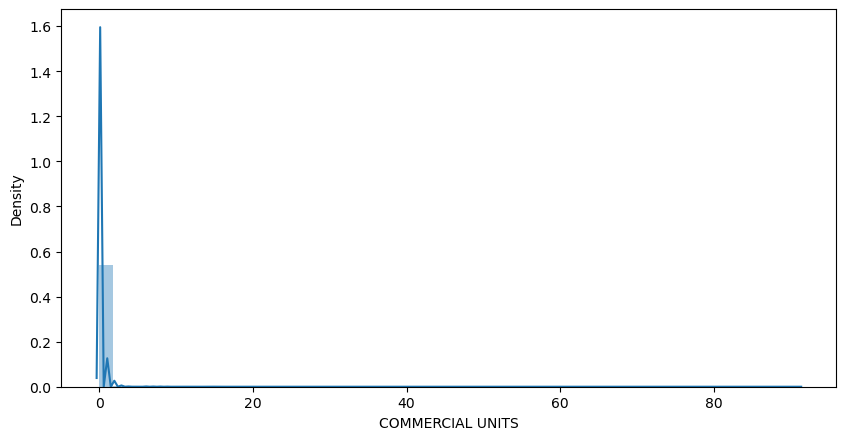

In [108]:
#Distribution of COMMERICIAL UNITS
plt.figure(figsize=(10, 5), dpi = 100)
sns.distplot(df['COMMERCIAL UNITS'])

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL UNITS'>

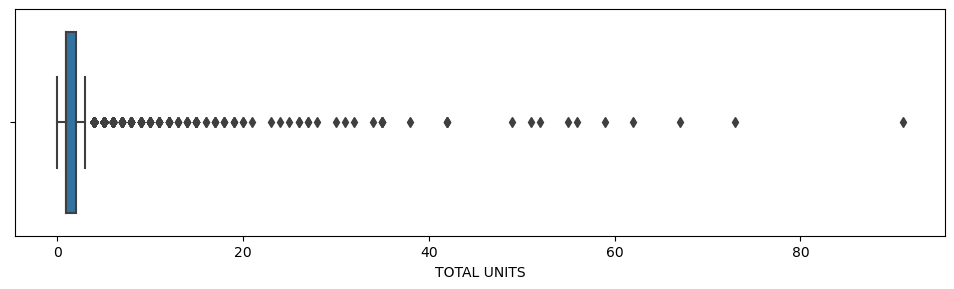

In [109]:
# Still we can see that there are so many values which are far away from average
# Many buildings have either 0, 1 or 2 units that's why graph shows such results.
# we can't drop a few buildings which have many units
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['TOTAL UNITS'])

C:\Users\123\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOTAL UNITS', ylabel='Density'>

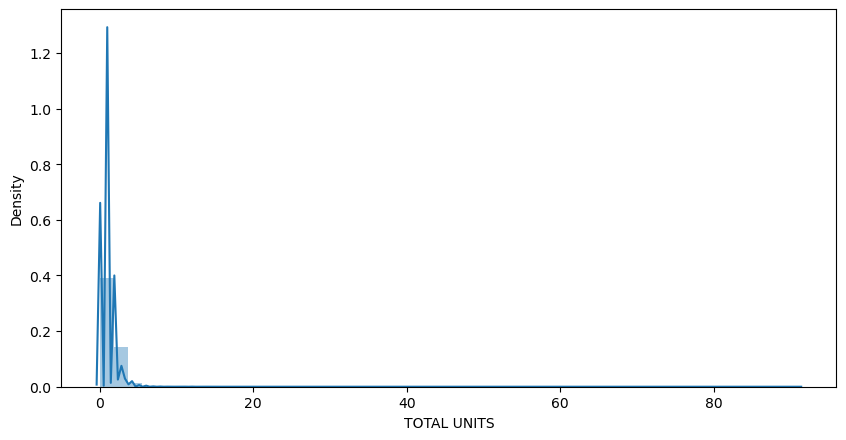

In [110]:
#Distribution of COMMERICIAL UNITS
plt.figure(figsize=(10, 5), dpi = 100)
sns.distplot(df['TOTAL UNITS'])

In [111]:
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                    float64
LOT                                       object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                   int32
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
YEAR BUILT                                 int32
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
Quarter                                   object
Year                                       int64
Month                                      int64
Week                

# Questions

# 1. Which month sold more buildings which had no RESIDENTIAL Units?

In [112]:
df[df['RESIDENTIAL UNITS'] == 0].groupby('Month')['BOROUGH'].count().idxmax()

6

# 2. How many buildings were inherited to their children from parents?

In [113]:
df[df['SALE PRICE'] == 0.0].shape[0]

23313

# 3. What is the average price of buildings from Alphabet City Neighborhood?

In [114]:
df[df['NEIGHBORHOOD'] == 'ALPHABET CITY']['SALE PRICE'].mean()

1279275.64171123

# 4. How many buildings have more commericial units than residential units?

In [115]:
df[df['COMMERCIAL UNITS'] > df['RESIDENTIAL UNITS']].shape[0]

2513

# 5. Which neighbourhood has on average more expensive buildings?

In [116]:
df.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().idxmax()

'BLOOMFIELD'

# 6. How many buildings with no commericial units are sold in summers after 2000?

In [117]:
df[(df['COMMERCIAL UNITS'] == 0) & (df['Month'] == 6) | (df['Month'] == 7) & (df['Year'] >= 2000)].shape[0]

13606

# 7. Which neighbour sold the highest building ever and in how much?

In [118]:
print('Neighbour: ', df.iloc[df['SALE PRICE'].idxmax()]['NEIGHBORHOOD'], ' Price: ' ,df['SALE PRICE'].max())

Neighbour:  MIDTOWN EAST  Price:  2210000000.0


# 8. Which Building class at the time of sale was sold the most and how many buidlings?

In [119]:
print('Building class: ', df.groupby('BUILDING CLASS AT TIME OF SALE')['SALE PRICE'].count().idxmax())
print('Number of buildings: ', df.groupby('BUILDING CLASS AT TIME OF SALE')['SALE PRICE'].count().max())

Building class:  R4
Number of buildings:  12989


# EDA

# BOROUGH Column

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of each Borough')

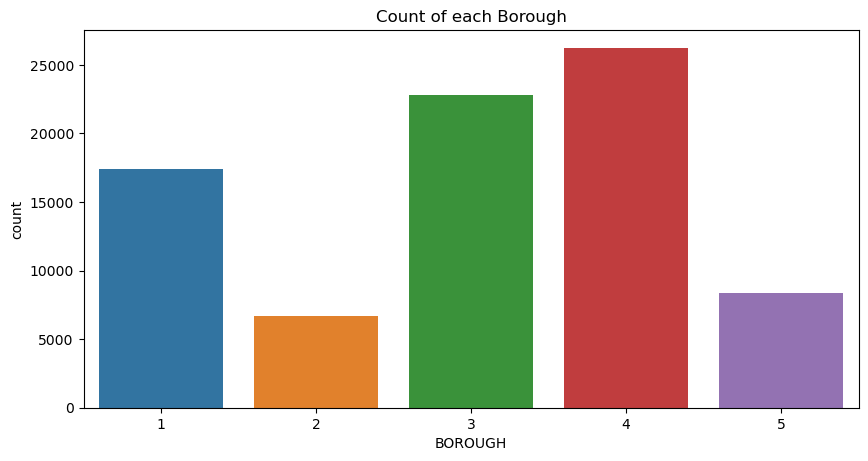

In [120]:
plt.figure(figsize=(10, 5), dpi = 100)
sns.countplot(df['BOROUGH'])
plt.title('Count of each Borough')

Text(0, 0.5, 'Average Sale Price')

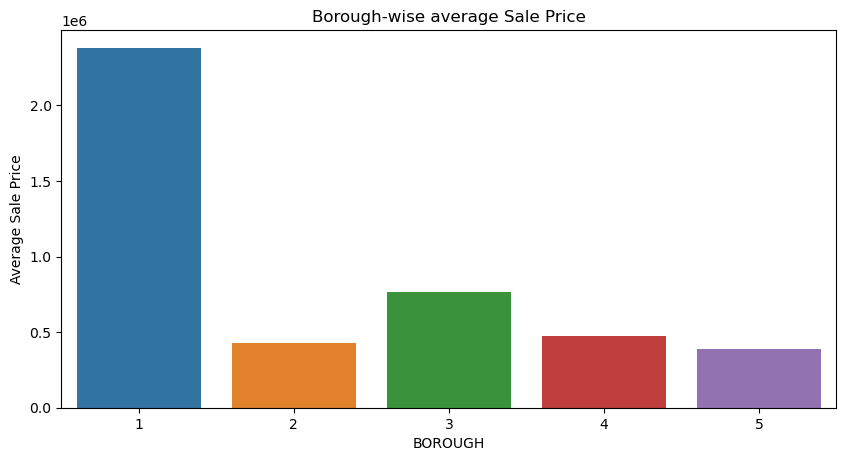

In [121]:
plt.figure(figsize=(10, 5), dpi = 100)
sns.barplot(x = df.groupby('BOROUGH')['SALE PRICE'].mean().index, y = df.groupby('BOROUGH')['SALE PRICE'].mean().values)
plt.title('Borough-wise average Sale Price')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price')

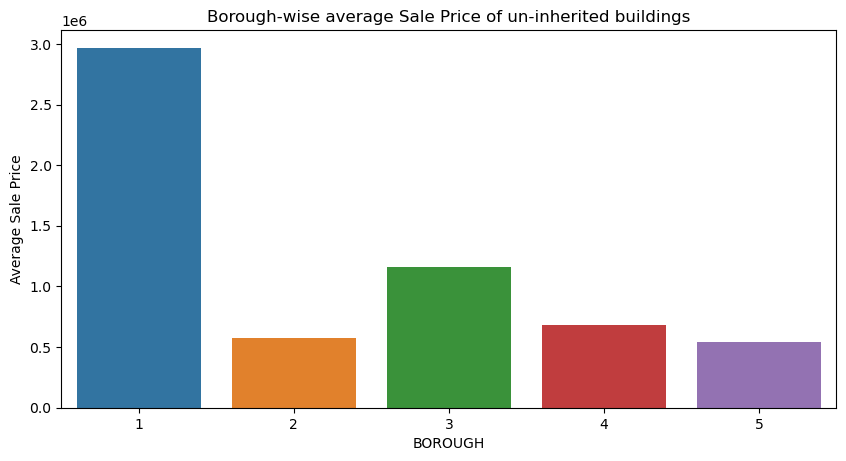

In [122]:
plt.figure(figsize=(10, 5), dpi = 100)
sns.barplot(x = df[df['SALE PRICE'] != 0.0].groupby('BOROUGH')['SALE PRICE'].mean().index, y = df[df['SALE PRICE'] != 0.0].groupby('BOROUGH')['SALE PRICE'].mean().values)
plt.title('Borough-wise average Sale Price of un-inherited buildings')
plt.ylabel('Average Sale Price')

Text(0.5, 0, 'Average Sale Price')

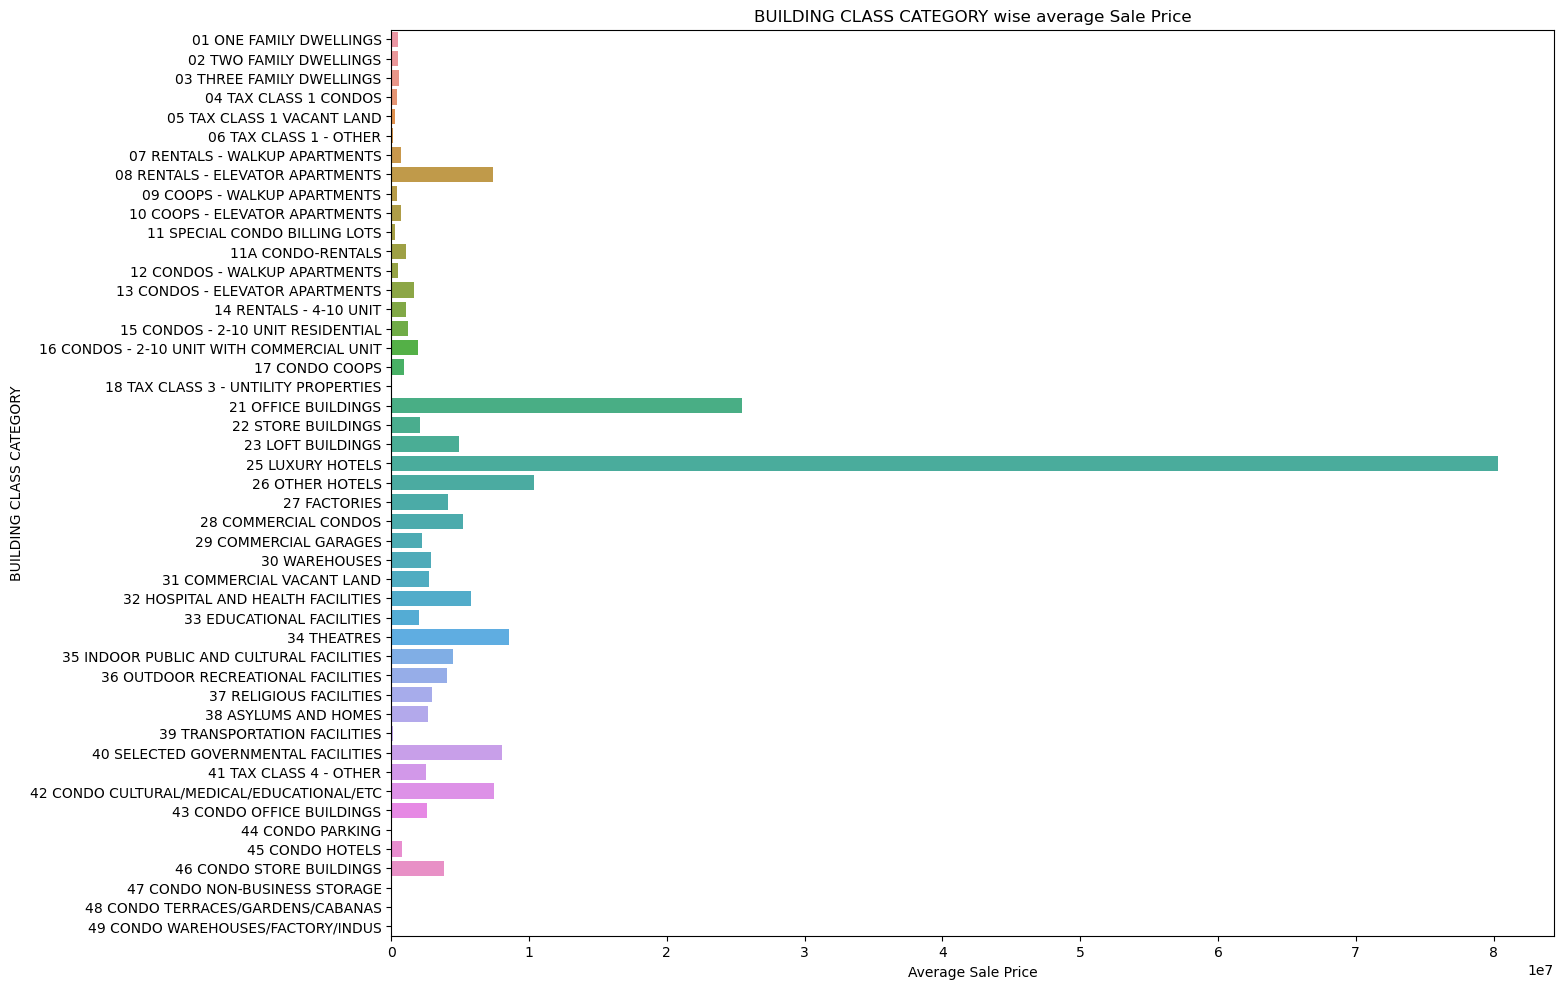

In [123]:
plt.figure(figsize=(15, 12), dpi = 100)
sns.barplot(x = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].mean().values, y = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].mean().index)
plt.title('BUILDING CLASS CATEGORY wise average Sale Price')
plt.xlabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price')

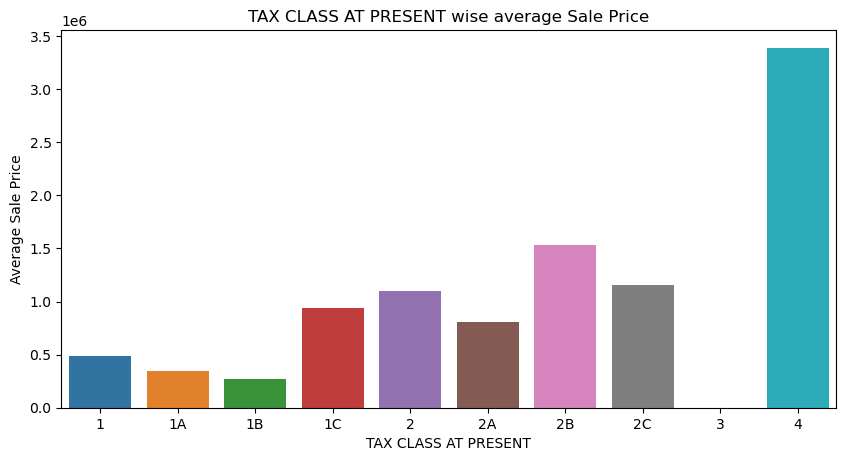

In [124]:
plt.figure(figsize=(10, 5), dpi = 100)
sns.barplot(x = df.groupby('TAX CLASS AT PRESENT')['SALE PRICE'].mean().index, y = df.groupby('TAX CLASS AT PRESENT')['SALE PRICE'].mean().values)
plt.title('TAX CLASS AT PRESENT wise average Sale Price')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price')

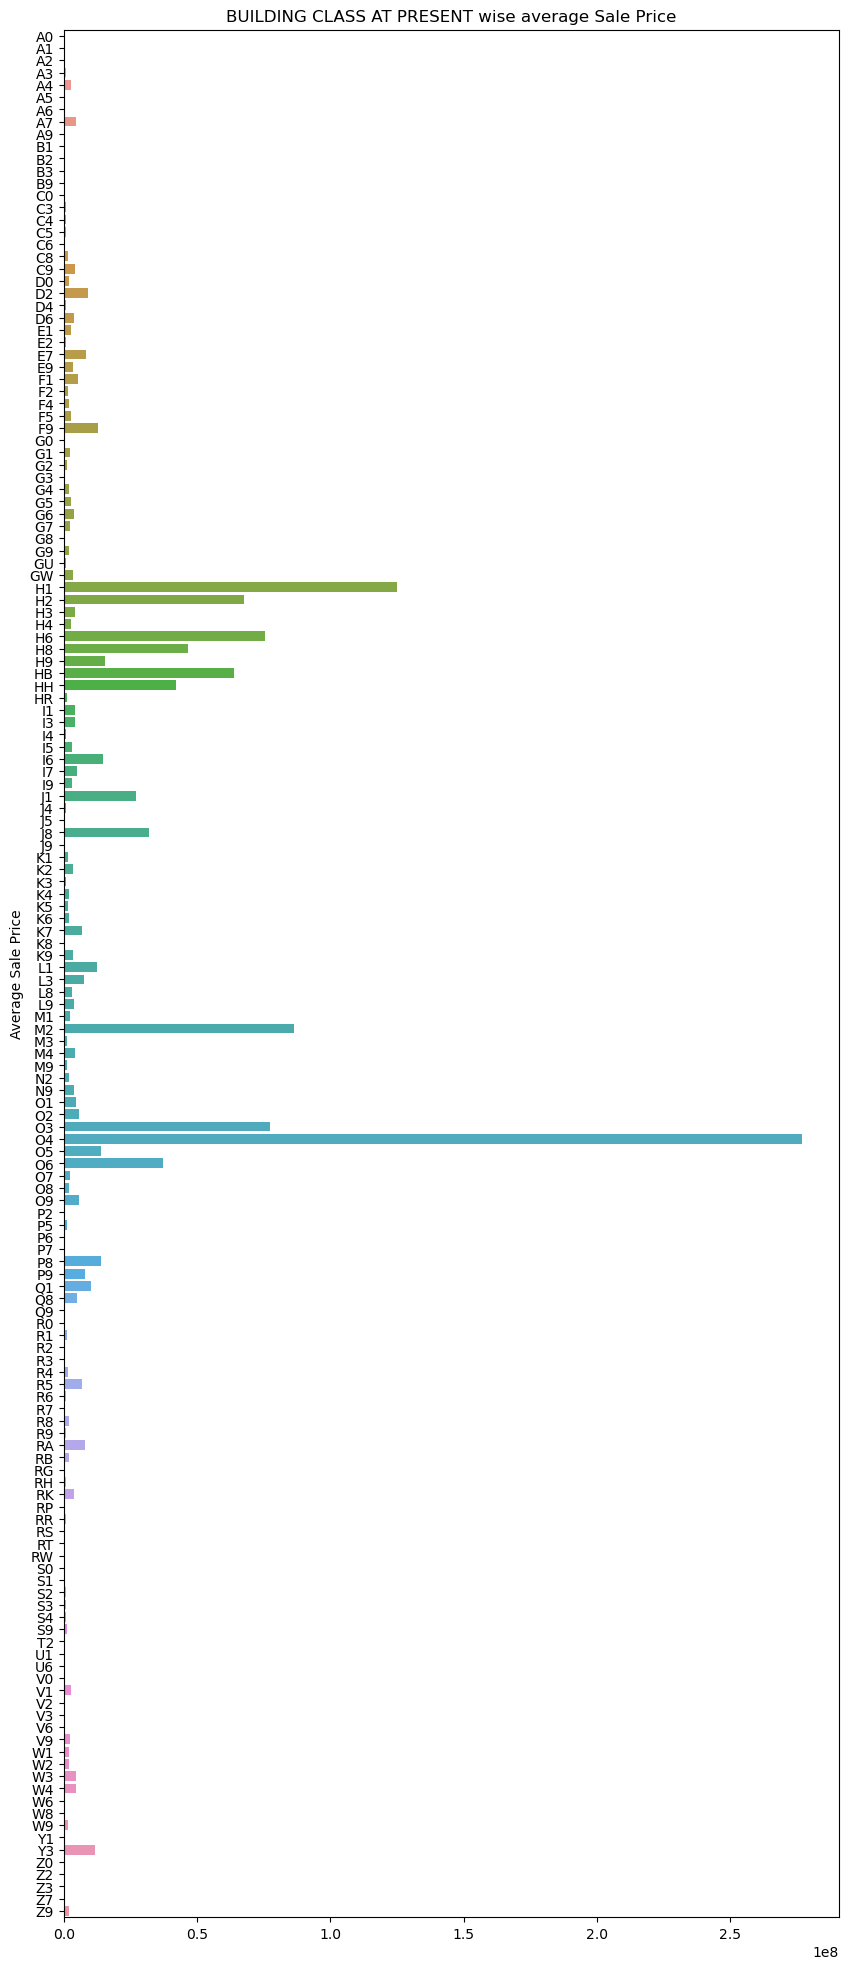

In [125]:
plt.figure(figsize=(10, 25), dpi = 100)
sns.barplot(x = df.groupby('BUILDING CLASS AT PRESENT')['SALE PRICE'].mean().values, y = df.groupby('BUILDING CLASS AT PRESENT')['SALE PRICE'].mean().index)
plt.title('BUILDING CLASS AT PRESENT wise average Sale Price')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price')

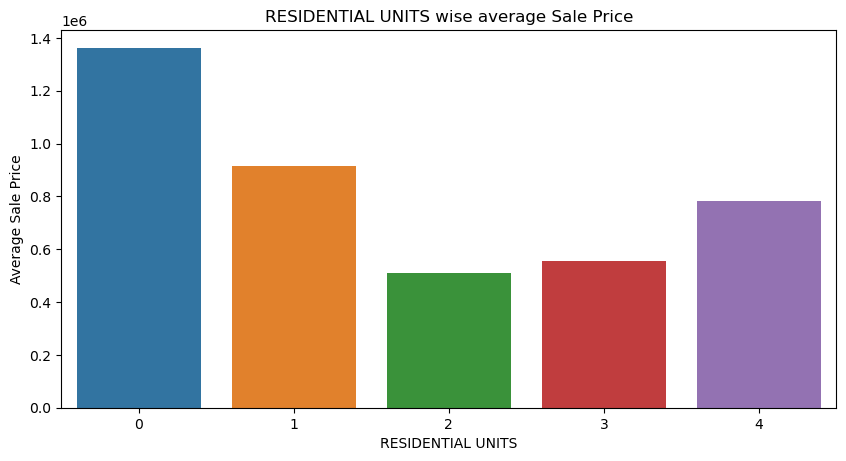

In [126]:
plt.figure(figsize=(10, 5), dpi = 100)
sns.barplot(x = df.groupby('RESIDENTIAL UNITS')['SALE PRICE'].mean().index, y = df.groupby('RESIDENTIAL UNITS')['SALE PRICE'].mean().values)
plt.title('RESIDENTIAL UNITS wise average Sale Price')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price')

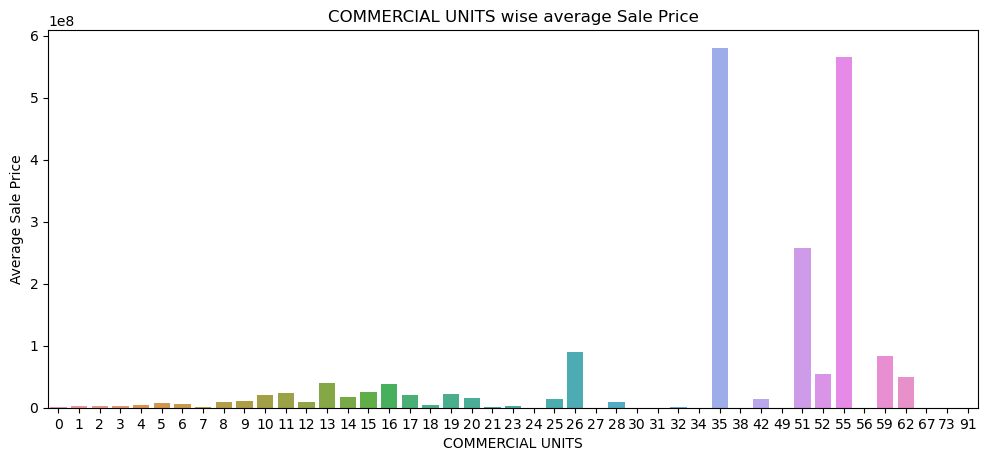

In [127]:
plt.figure(figsize=(12, 5), dpi = 100)
sns.barplot(x = df.groupby('COMMERCIAL UNITS')['SALE PRICE'].mean().index, y = df.groupby('COMMERCIAL UNITS')['SALE PRICE'].mean().values)
plt.title('COMMERCIAL UNITS wise average Sale Price')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price')

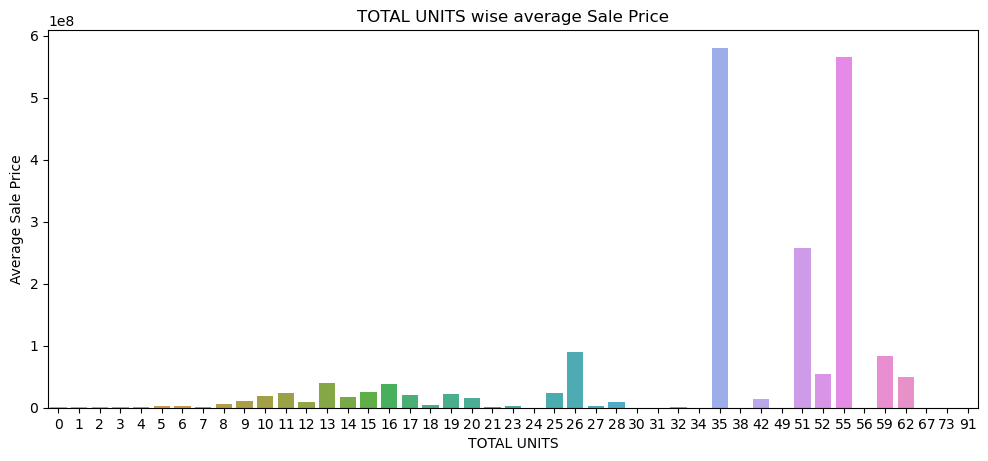

In [128]:
plt.figure(figsize=(12, 5), dpi = 100)
sns.barplot(x = df.groupby('TOTAL UNITS')['SALE PRICE'].mean().index, y = df.groupby('TOTAL UNITS')['SALE PRICE'].mean().values)
plt.title('TOTAL UNITS wise average Sale Price')
plt.ylabel('Average Sale Price')

Text(0, 0.5, 'Average Sale Price')

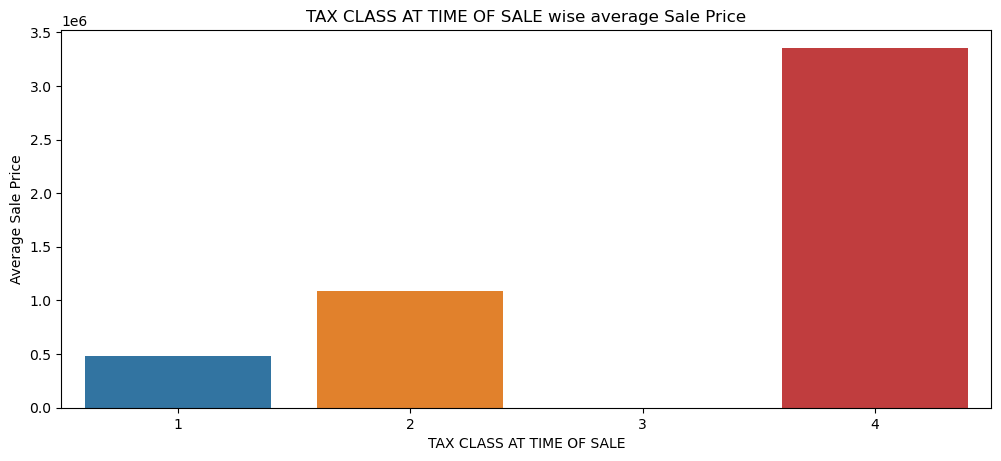

In [129]:
plt.figure(figsize=(12, 5), dpi = 100)
sns.barplot(x = df.groupby('TAX CLASS AT TIME OF SALE')['SALE PRICE'].mean().index, y = df.groupby('TAX CLASS AT TIME OF SALE')['SALE PRICE'].mean().values)
plt.title('TAX CLASS AT TIME OF SALE wise average Sale Price')
plt.ylabel('Average Sale Price')

# Quartely average sale

**2nd and 4th Quarter crossed overall average sale**

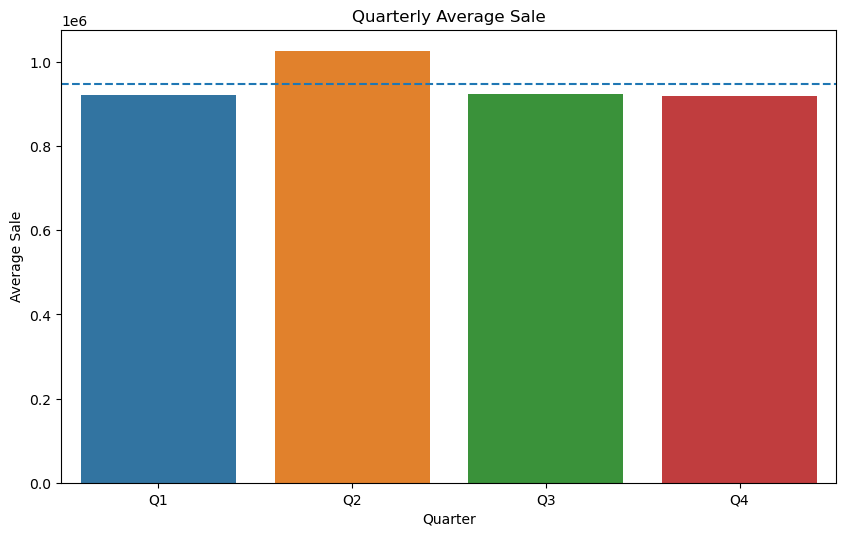

In [130]:
plt.figure(figsize=(10, 6), dpi = 100)
sns.barplot(y = df.groupby('Quarter')['SALE PRICE'].mean().values, x = df.groupby('Quarter')['SALE PRICE'].mean().index)
plt.title('Quarterly Average Sale')
plt.ylabel('Average Sale')
plt.axhline(df['SALE PRICE'].mean(), ls='--')

# Monthly Average Sale

**Blue line represents overall average sale. Only 1st, 5th and 12th months crossed overall average sale**

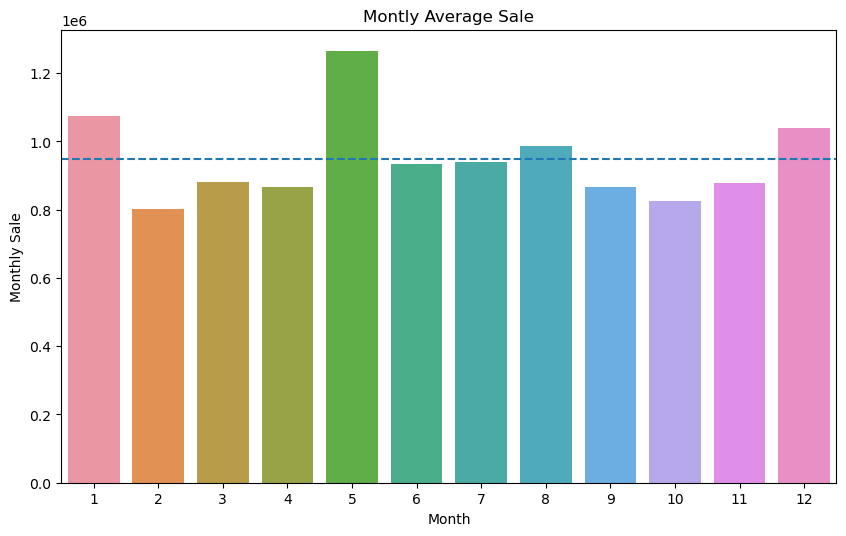

In [131]:
plt.figure(figsize=(10, 6), dpi = 100)
sns.barplot(y = df.groupby('Month')['SALE PRICE'].mean().values, x = df.groupby('Month')['SALE PRICE'].mean().index)
plt.title('Montly Average Sale')
plt.ylabel('Monthly Sale')
plt.axhline(df['SALE PRICE'].mean(), ls='--')

# Weekly Average Sale

**18th week had the highest sale ever**

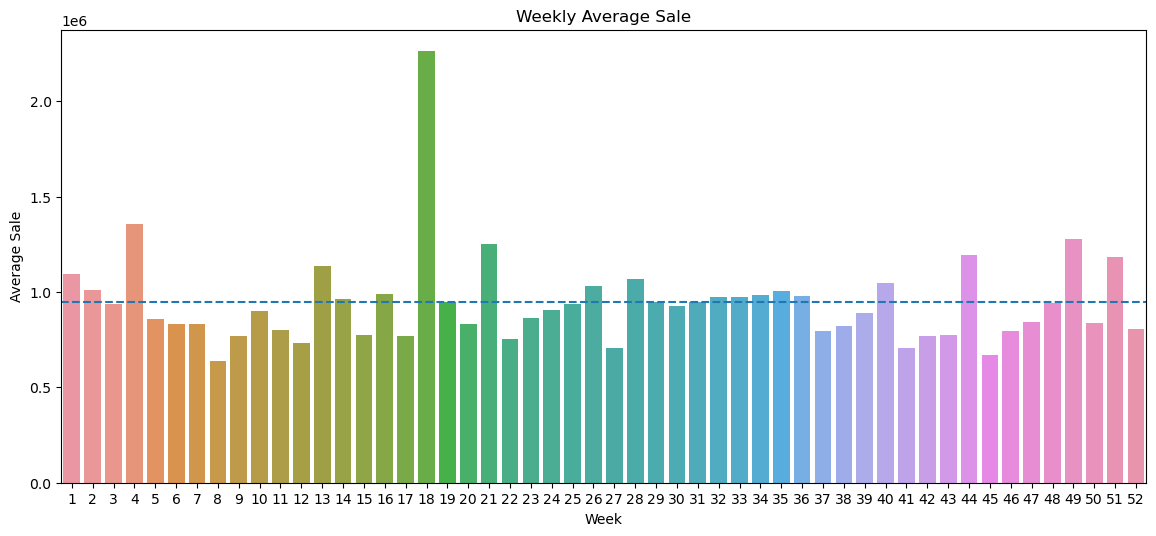

In [132]:
plt.figure(figsize=(14, 6), dpi = 100)
sns.barplot(y = df.groupby('Week')['SALE PRICE'].mean().values, x = df.groupby('Week')['SALE PRICE'].mean().index)
plt.title('Weekly Average Sale')
plt.ylabel('Average Sale')
plt.axhline(df['SALE PRICE'].mean(), ls='--')

In [133]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE', 'Quarter',
       'Year', 'Month', 'Week', 'Day'],
      dtype='object')

In [134]:
# Age of the building before it was sold
df['Building Age'] = df['Year'] - df['YEAR BUILT'] 

C:\Users\123\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Building Age', ylabel='Density'>

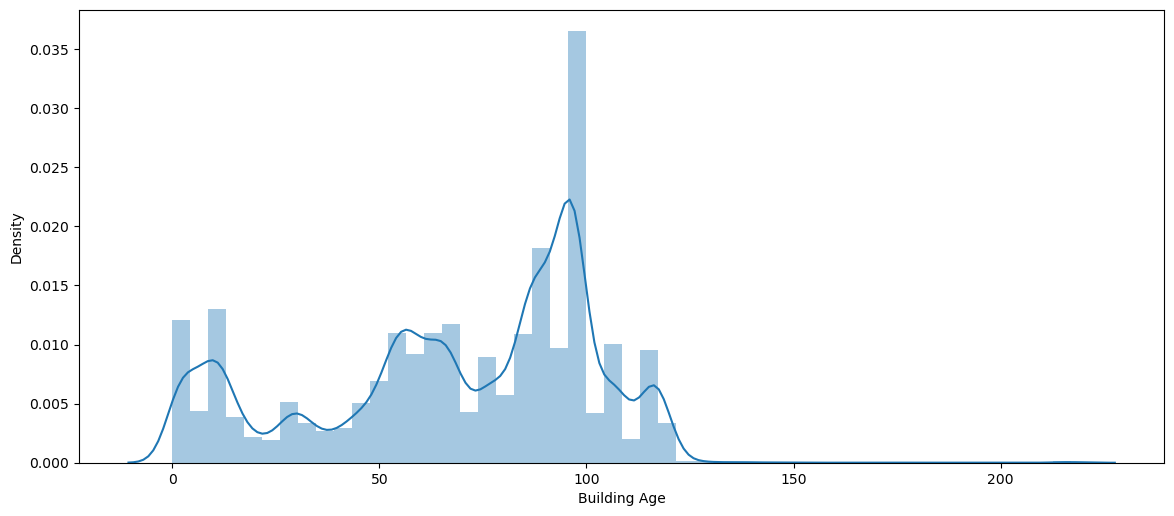

In [135]:
#Distribution of the age of the building when it was sold
plt.figure(figsize=(14, 6), dpi = 100)
sns.distplot(df['Building Age'])

# None of the column is in good correlation with Sale Price

In [136]:
df.corr()

,BOROUGH,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,Year,Month,Week,Day,Building Age
BOROUGH,1.000000,0.415083,0.602984,0.202969,-0.029056,0.112769,0.080256,-0.314663,-0.064448,-0.016068,0.001140,0.000119,-0.005431,-0.080470
BLOCK,0.415083,1.000000,0.557183,0.133700,-0.024450,0.066243,-0.032195,-0.284621,-0.050179,-0.010598,0.007823,0.007529,0.005027,0.032040
ZIP CODE,0.602984,0.557183,1.000000,0.222794,-0.014296,0.143675,-0.099073,-0.184123,-0.054098,-0.009799,0.006257,0.006496,0.007912,0.098919
RESIDENTIAL UNITS,0.202969,0.133700,0.222794,1.000000,-0.048510,0.628529,-0.106563,-0.523984,-0.028157,-0.009652,-0.006939,-0.006390,0.004209,0.106410
COMMERCIAL UNITS,-0.029056,-0.024450,-0.014296,-0.048510,1.000000,0.735576,-0.027704,0.213405,0.208819,-0.014948,0.010791,0.010416,-0.005249,0.027489
TOTAL UNITS,0.112769,0.066243,0.143675,0.628529,0.735576,1.000000,-0.074738,-0.131238,0.141134,-0.020689,0.004240,0.004417,0.000395,0.074434
YEAR BUILT,0.080256,-0.032195,-0.099073,-0.106563,-0.027704,-0.074738,1.000000,0.151169,0.006337,-0.004068,-0.004772,-0.004646,-0.003698,-0.999900
TAX CLASS AT TIME OF SALE,-0.314663,-0.284621,-0.184123,-0.523984,0.213405,-0.131238,0.151169,1.000000,0.072816,-0.010222,0.015557,0.015384,-0.005463,-0.151290
SALE PRICE,-0.064448,-0.050179,-0.054098,-0.028157,0.208819,0.141134,0.006337,0.072816,1.000000,0.003145,-0.001200,-0.001537,-0.003011,-0.006292
Year,-0.016068,-0.010598,-0.009799,-0.009652,-0.014948,-0.020689,-0.004068,-0.010222,0.003145,1.000000,-0.832836,-0.831238,-0.003596,0.018177


# Heatpmap of correlation

<AxesSubplot:>

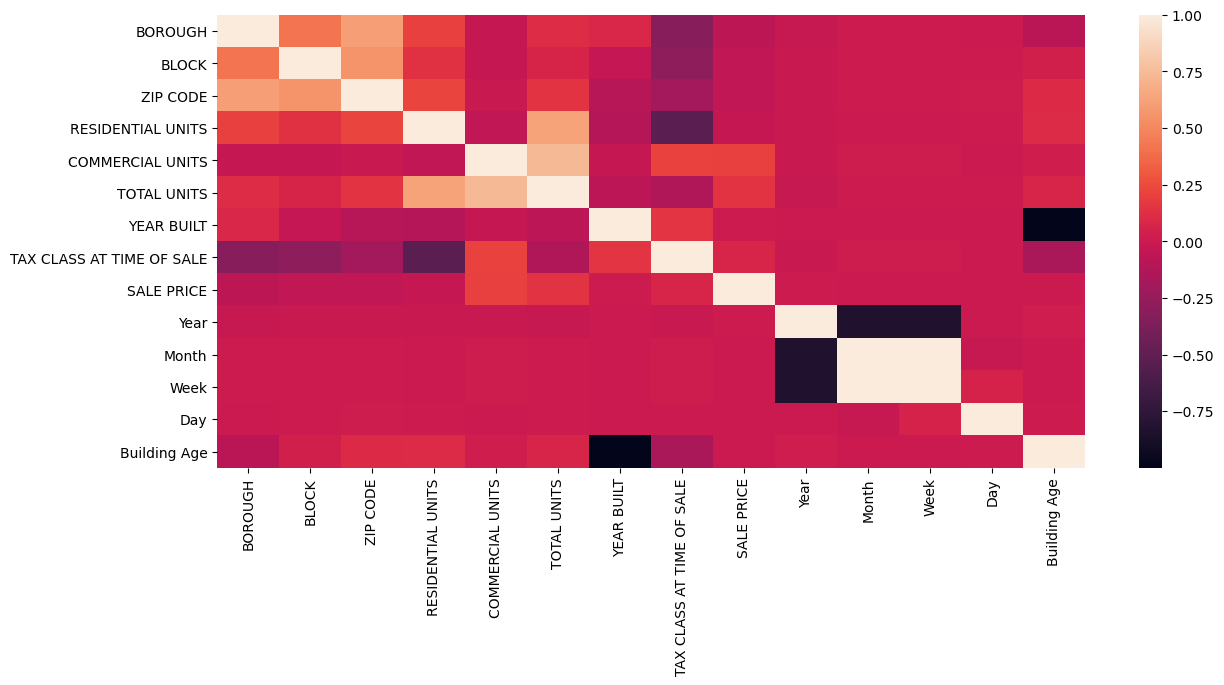

In [137]:
plt.figure(figsize=(14, 6), dpi = 100)
sns.heatmap(df.corr())

# Following graphs show that almost all columns are not in good correlation with Sale Price

# Total Units vs SALE PRICE

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL UNITS', ylabel='SALE PRICE'>

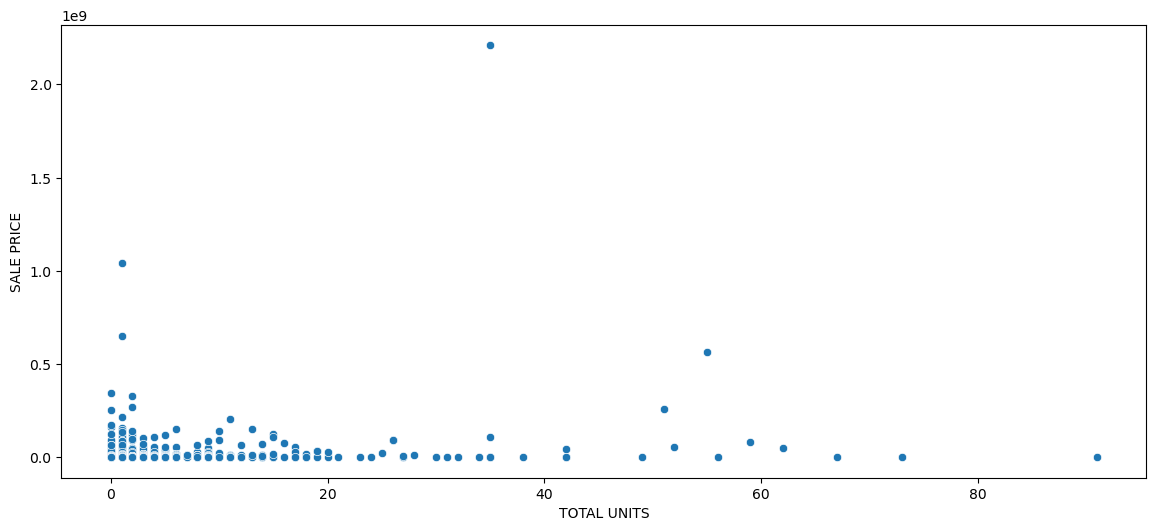

In [138]:
plt.figure(figsize=(14, 6), dpi = 100)
sns.scatterplot(df['TOTAL UNITS'], df['SALE PRICE'])

# BLOCK vs SALE PRICE

C:\Users\123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BLOCK', ylabel='SALE PRICE'>

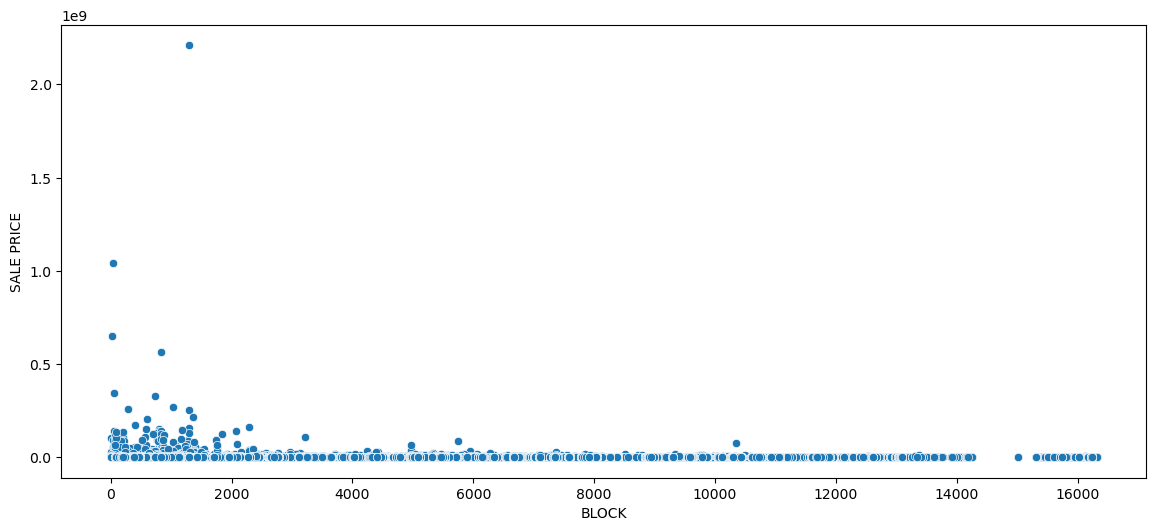

In [139]:
plt.figure(figsize=(14, 6), dpi = 100)
sns.scatterplot(df['BLOCK'], df['SALE PRICE'])

# Basic statistics 

In [140]:
df.describe()

,BOROUGH,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,Year,Month,Week,Day,Building Age
count,81491.000000,81491.000000,81491.00000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,8.149100e+04,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000
mean,3.018530,4294.178830,10859.52137,1.055663,0.105668,1.193052,1948.245365,1.643347,9.487629e+05,2016.651692,6.555509,26.722607,16.272693,68.406327
std,1.292113,3592.373682,562.85678,0.934139,1.040245,1.347532,33.761541,0.829569,1.005312e+07,0.476437,3.468109,15.048614,8.817488,33.766841
min,1.000000,1.000000,10001.00000,0.000000,0.000000,0.000000,1800.000000,1.000000,0.000000e+00,2016.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1327.000000,10306.00000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00,2016.000000,4.000000,14.000000,9.000000,50.000000
50%,3.000000,3380.000000,11210.00000,1.000000,0.000000,1.000000,1940.000000,1.000000,4.150000e+05,2017.000000,6.000000,26.000000,16.000000,77.000000
75%,4.000000,6399.500000,11357.00000,2.000000,0.000000,2.000000,1967.000000,2.000000,8.146285e+05,2017.000000,10.000000,40.000000,24.000000,96.000000
max,5.000000,16322.000000,11694.00000,4.000000,91.000000,91.000000,2017.000000,4.000000,2.210000e+09,2017.000000,12.000000,52.000000,31.000000,217.000000


In [141]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Quarter,Year,Month,Week,Day,Building Age
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3 STREET, 1C",10009,0,...,2,C6,1.0,2016-09-06,Q3,2016,9,36,6,96
17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3 STREET, 1C",10009,0,...,2,C6,499000.0,2017-03-10,Q1,2017,3,10,10,97
18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3 STREET, 3A",10009,0,...,2,C6,10.0,2017-04-28,Q2,2017,4,17,28,97
19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3RD STREET, 5A",10009,0,...,2,C6,529500.0,2017-06-09,Q2,2017,6,23,9,97
20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3 STREET, 2E",10009,0,...,2,C6,423000.0,2017-07-14,Q3,2017,7,28,14,97


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81491 entries, 16 to 8413
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         81491 non-null  int64         
 1   NEIGHBORHOOD                    81491 non-null  object        
 2   BUILDING CLASS CATEGORY         81491 non-null  object        
 3   TAX CLASS AT PRESENT            81491 non-null  object        
 4   BLOCK                           81491 non-null  float64       
 5   LOT                             81491 non-null  object        
 6   BUILDING CLASS AT PRESENT       81491 non-null  object        
 7   ADDRESS                         81491 non-null  object        
 8   ZIP CODE                        81491 non-null  int32         
 9   RESIDENTIAL UNITS               81491 non-null  int64         
 10  COMMERCIAL UNITS                81491 non-null  int64         
 11  TO

# Covariance between Total Units and Sale Price

In [144]:
covariance = np.cov(df['TOTAL UNITS'], df['SALE PRICE'])
print(covariance)

[[1.81584128e+00 1.91192845e+06]
 [1.91192845e+06 1.01065309e+14]]


# Covariance between Block and Sale Price

In [145]:
covariance = np.cov(df['BLOCK'], df['SALE PRICE'])
print(covariance)

[[ 1.29051487e+07 -1.81218969e+09]
 [-1.81218969e+09  1.01065309e+14]]


# Pearson Correlation Coefficient

From Pearson Correlation Coefficient, we can see that columns are not correlated as showed previous through corr() function 

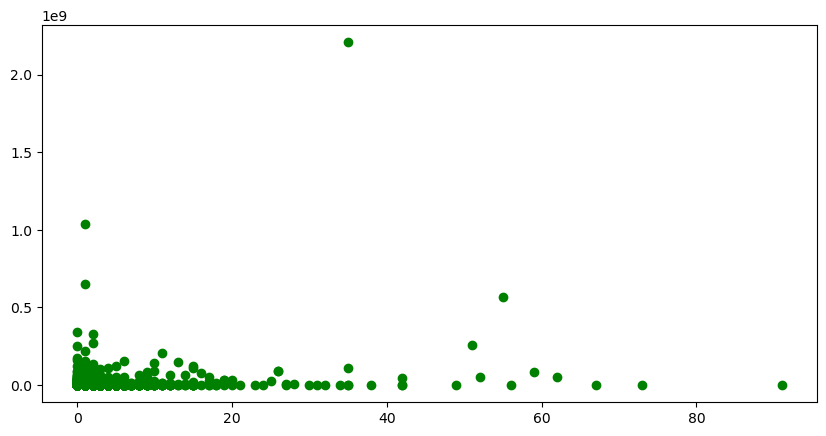

Pearsons correlation: 0.14
P value: 0.000000


In [148]:
from scipy.stats import pearsonr
plt.figure(figsize=(10, 5), dpi = 100)
plt.scatter(df['TOTAL UNITS'], df['SALE PRICE'], c='green')
plt.show()

# calculate Pearson's correlation
corr, p = pearsonr(df['TOTAL UNITS'], df['SALE PRICE'])
print('Pearsons correlation: %.2f' % corr)
print('P value: %.6f' % p)

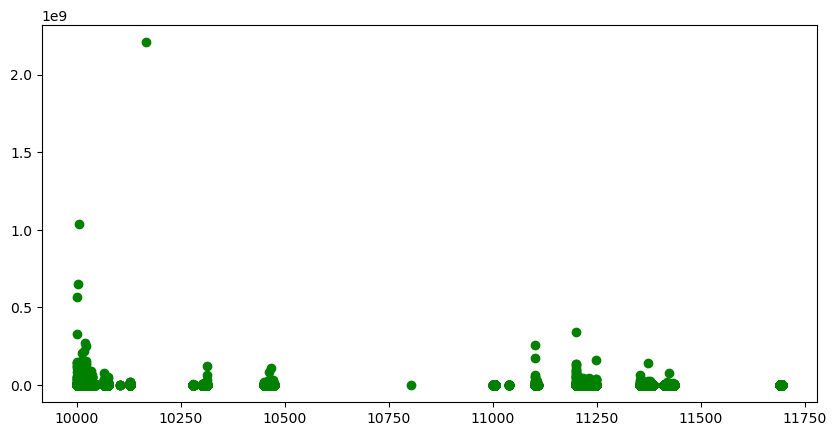

Pearsons correlation: -0.05
P value: 0.000000


In [153]:
from scipy.stats import pearsonr
plt.figure(figsize=(10, 5), dpi = 100)
plt.scatter(df['ZIP CODE'], df['SALE PRICE'], c='green')
plt.show()

# calculate Pearson's correlation
corr, p = pearsonr(df['ZIP CODE'], df['SALE PRICE'])
print('Pearsons correlation: %.2f' % corr)
print('P value: %.6f' % p)

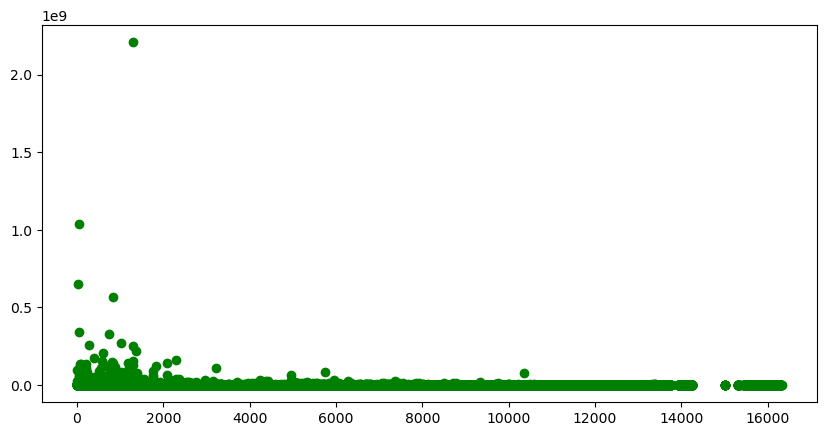

Pearsons correlation: -0.05
P value: 0.000000


In [154]:
from scipy.stats import pearsonr
plt.figure(figsize=(10, 5), dpi = 100)
plt.scatter(df['BLOCK'], df['SALE PRICE'], c='green')
plt.show()

# calculate Pearson's correlation
corr, p = pearsonr(df['BLOCK'], df['SALE PRICE'])
print('Pearsons correlation: %.2f' % corr)
print('P value: %.6f' % p)

# Spearman Correlation  vs Pearsons correlation

In [155]:
from scipy.stats import spearmanr

corr, _ = spearmanr(df['TOTAL UNITS'], df['SALE PRICE'])
print('Spearman correlation: %.2f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df['TOTAL UNITS'], df['SALE PRICE'])
print('Pearsons correlation: %.2f' % corr)

Spearman correlation: -0.05
Pearsons correlation: 0.14


In [156]:
from scipy.stats import spearmanr

corr, _ = spearmanr(df['BLOCK'], df['SALE PRICE'])
print('Spearman correlation: %.2f' % corr)

# calculate Pearson's correlation
corr, _ = pearsonr(df['BLOCK'], df['SALE PRICE'])
print('Pearsons correlation: %.2f' % corr)

Spearman correlation: -0.23
Pearsons correlation: -0.05


# Statistical summries

# Sale Price with numerical columns

In [176]:
model = sm.OLS(df['SALE PRICE'], df['BOROUGH']).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             SALE PRICE   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              305.6
Date:                Mon, 01 Mar 2021   Prob (F-statistic):                    2.60e-68
Time:                        23:26:08   Log-Likelihood:                     -1.4298e+06
No. Observations:               81491   AIC:                                  2.860e+06
Df Residuals:                   81490   BIC:                                  2.860e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [177]:
model = sm.OLS(df['SALE PRICE'], df['ZIP CODE']).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             SALE PRICE   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              681.1
Date:                Mon, 01 Mar 2021   Prob (F-statistic):                   1.58e-149
Time:                        23:28:38   Log-Likelihood:                     -1.4296e+06
No. Observations:               81491   AIC:                                  2.859e+06
Df Residuals:                   81490   BIC:                                  2.859e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [179]:
model = sm.OLS(df['SALE PRICE'], df['TOTAL UNITS']).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             SALE PRICE   R-squared (uncentered):                   0.028
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              2352.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:29:10   Log-Likelihood:                     -1.4287e+06
No. Observations:               81491   AIC:                                  2.857e+06
Df Residuals:                   81490   BIC:                                  2.857e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Sale Price with categorical columns

In [184]:
df['Sale'] = df['SALE PRICE']

In [185]:
model = ols('Sale ~ C(Q("Quarter"))', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sale   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5624
Date:                Mon, 01 Mar 2021   Prob (F-statistic):              0.640
Time:                        23:31:28   Log-Likelihood:            -1.4295e+06
No. Observations:               81491   AIC:                         2.859e+06
Df Residuals:                   81487   BIC:                         2.859e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               9.21e+

In [186]:
model = ols('Sale ~ C(Q("Week"))', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sale   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9358
Date:                Mon, 01 Mar 2021   Prob (F-statistic):              0.604
Time:                        23:31:43   Log-Likelihood:            -1.4295e+06
No. Observations:               81491   AIC:                         2.859e+06
Df Residuals:                   81439   BIC:                         2.860e+06
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.095e+06   3.06

In [188]:
model = ols('Sale ~ C(Q("Month"))', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sale   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.150
Date:                Mon, 01 Mar 2021   Prob (F-statistic):              0.317
Time:                        23:32:11   Log-Likelihood:            -1.4295e+06
No. Observations:               81491   AIC:                         2.859e+06
Df Residuals:                   81479   BIC:                         2.859e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.074e+06   1

In [189]:
model = ols('Sale ~ C(Q("TAX CLASS AT PRESENT"))', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sale   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     51.18
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           2.94e-93
Time:                        23:32:26   Log-Likelihood:            -1.4293e+06
No. Observations:               81491   AIC:                         2.859e+06
Df Residuals:                   81481   BIC:                         2.859e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

# Chi-Squared Tests

In [192]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

data_crosstab = pd.crosstab(df['BOROUGH'], df['Month'], 
margins = False) 
data_crosstab

Month,1,2,3,4,5,6,7,8,9,10,11,12
BOROUGH,,,,,,,,,,,,
1,1530,1237,1445,1241,1546,1729,1334,1524,1653,1386,1263,1527
2,527,513,576,578,600,665,482,407,613,535,541,616
3,1833,1754,2157,1674,2008,2203,1703,1537,2098,1746,1915,2189
4,2081,1965,2451,2018,2293,2371,1984,1747,2330,2187,2369,2423
5,703,636,843,675,718,937,593,289,794,694,748,757


In [193]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

data_crosstab = pd.crosstab(df['BOROUGH'], df['Quarter'], 
margins = False) 
data_crosstab

Quarter,Q1,Q2,Q3,Q4
BOROUGH,,,,
1,4212,4516,4511,4176
2,1616,1843,1502,1692
3,5744,5885,5338,5850
4,6497,6682,6061,6979
5,2182,2330,1676,2199


In [195]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

data_crosstab = pd.crosstab(df['BOROUGH'], df['TAX CLASS AT PRESENT'], 
margins = False) 
data_crosstab

TAX CLASS AT PRESENT,1,1A,1B,1C,2,2A,2B,2C,3,4
BOROUGH,,,,,,,,,,
1,341,3,0,13,15043,119,1,590,2,1303
2,4053,117,232,0,1536,183,1,1,2,528
3,12105,430,279,166,5524,916,12,1228,0,2157
4,15871,383,393,4,7399,337,5,87,0,1740
5,6725,511,330,3,416,40,0,4,0,358


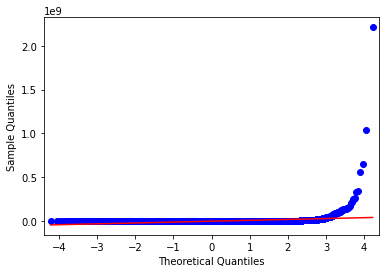

In [200]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['SALE PRICE'], line = 's')
plt.show()

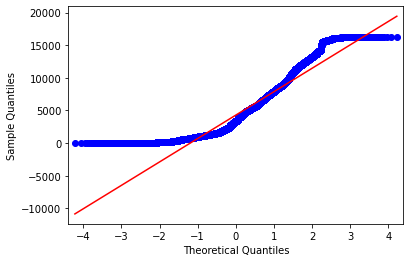

In [202]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['BLOCK'], line = 's')
plt.show()

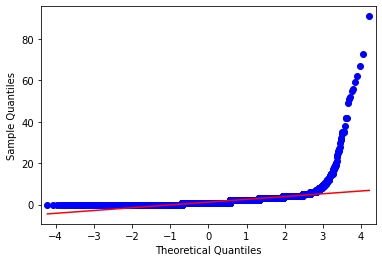

In [204]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['TOTAL UNITS'], line = 's')
plt.show()

In [205]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Quarter,Year,Month,Week,Day,Building Age,Sale
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3 STREET, 1C",10009,0,...,C6,1.0,2016-09-06,Q3,2016,9,36,6,96,1.0
17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3 STREET, 1C",10009,0,...,C6,499000.0,2017-03-10,Q1,2017,3,10,10,97,499000.0
18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3 STREET, 3A",10009,0,...,C6,10.0,2017-04-28,Q2,2017,4,17,28,97,10.0
19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3RD STREET, 5A",10009,0,...,C6,529500.0,2017-06-09,Q2,2017,6,23,9,97,529500.0
20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,402.0,40,C6,"327 EAST 3 STREET, 2E",10009,0,...,C6,423000.0,2017-07-14,Q3,2017,7,28,14,97,423000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,B9,37 QUAIL LANE,10309,2,...,B9,450000.0,2016-11-28,Q4,2016,11,48,28,18,450000.0
8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,B9,32 PHEASANT LANE,10309,2,...,B9,550000.0,2017-04-21,Q2,2017,4,16,21,19,550000.0
8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,B2,49 PITNEY AVENUE,10309,2,...,B2,460000.0,2017-07-05,Q3,2017,7,27,5,92,460000.0
8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,K6,2730 ARTHUR KILL ROAD,10309,0,...,K6,11693337.0,2016-12-21,Q4,2016,12,51,21,15,11693337.0
